# BDA 2기 EDA 프로젝트 - 2조 중고신입 

<img src="https://media.bunjang.co.kr/images/nocrop/686345990.jpg" width = "1000px" heigh="300px"><img>

# 0. Problem Definition

## 



# Overall 

## 번개장터의 한정판 신발들의 가격이 신뢰도 있게 형성되는가 파악 
## 

In [ ]:
# # 한글 폰트 설정 
# from matplotlib import font_manager, rc
# f_path = "c:/Windows/Fonts/malgun.ttf"
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

# plt.rc('font', family='gulrim')

In [ ]:
# import os

# if os.name == 'posix':

#     plt.rc("font", family="AppleGothic")
# else :

#     plt.rc("font", family="Malgun Gothic")

# 1. Data Collection (Crawling)

## 1.1 수집 개요
- 사용된 파이썬 패키지
    - requests / json / time
    - pandas / numpy
- 데이터 출처 : 번개장터 신발데이터 (https://m.bunjang.co.kr/)
- 데이터 유형 : json 파일
- 데이터 선정 기준
    - 신발전문 거래 사이트 크림(Kream)에서 거래 상위 품목
    - 판매 등록 건수 100이상의 품목
- 데이터 품목
    - 나이키 : 나이키 덩크 하이 / 나이키 덩크 로우
    - 조던1 : 조던1 하이 / 조던1 미드 / 조던1 로우
    - 뉴발란스 : 뉴발란스 993 / 뉴발란스 992
    - 상품 = *'나이키 덩크로우 골든로드', '나이키 덩크로우 라이트본','나이키 덩크로우 바시티그린', '나이키 덩크로우 범고래','나이키 덩크로우 유니버시티블루',
 '나이키 덩크로우 코스트','나이키 덩크하이 네이비','나이키 덩크하이 범고래','나이키 덩크하이 오렌지','뉴발란스 992 그레이','뉴발란스 992 네이비',
 '뉴발란스 992 블랙그레이','뉴발란스 992 화이트실버','뉴발란스 993 그레이','뉴발란스 993 네이비','뉴발란스 993 블랙','조던 1 로우 스타피쉬',
 '조던 1 로우 울프그레이','조던 1 로우 트레비스 스캇''조던1 미드 그레이포그','조던1 미드 스모크그레이','조던1 미드 울프그레이',
'조던1 미드 짐레드','조던1 하이 다크모카','조던1 하이 스모크그레이', '조던1 하이 하이퍼로얄'*

## 1.2 크롤링

- 번개장터 데이터를 수집하기 위한 크롤러를 정의해서 사용합니다.
- 크롤링하는 과정을 함수화(모듈화)하여 편의성을 높입니다.
- 키워드 리스트를 만들어 for문을 수행합니다.

### 1.2.0 패키지 불러오기

In [ ]:
import requests # 크롤링을 위함
import json # json파일을 다루기위함
import time # 크롤링에 딜레이를 두기 위함
import pandas as pd
import numpy as np

### 1.2.1 Crawler 함수 생성

- keyword와 url, n을 인자로 받아 크롤링을 진행한다.
- keyword와 url은 리스트이고, n은 1페이지부터 n페이지까지 크롤링해준다. (**default=20** : 20페이지 * 100 = 2000개)
- 데이터프레임을 반환받으며, 크롤러 함수를 변수에 선언해주어야한다.

In [ ]:
# 번개장터 데이터를 크롤링 할 수 있는 함수, keyword와 n을 인자로 받는다.
def crawler(keyword, n=20):
    df = pd.DataFrame()
    
    for i in range(0,n):

        # 차단막는 코드, 랜덤으로 time.sleep 지정
        seed = np.random.randint(100)
        np.random.seed(seed)
        a = np.random.randint(3)
        time.sleep(a)
        
        url_formating = url.format(keyword, i) # url에 포맷팅을 적용한다.
        info = {
        'referer': 'https://m.bunjang.co.kr/',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'
        } # info는 변화없음

        print(f'{i}th, {(i+1)*100}개째 상품을 크롤링 중')
        # requests로 데이터 요청하기
        resp = requests.get(url_formating, headers = info)

        if resp.status_code == requests.codes.ok:
            data = json.loads(resp.text)
            next_df = pd.DataFrame(data['list'])
            df = pd.concat([df, next_df])

        else:
            print(f'{i}번째 요청이 잘못되었습니다.')
            pass # 넘겨준다.

    print('크롤링 완료!!')
    result = df.reset_index(drop=True)
    return result

### 1.2.2 Keywords, url 선언
- Crawler 함수에 들어갈 인자(keywords, url)를 선언한다.

In [ ]:
keywords = ['나이키 덩크로우', '나이키 덩크하이', '조던1 로우', '조던1 미드', '조던1 하이', '뉴발란스 993', '뉴발란스 992']
            
url = 'https://api.bunjang.co.kr/api/1/find_v2.json?q={}&order=date&page={}&request_id=20211110194853&stat_uid=77848616&token=c63b703f121940d189c222b3335d80ed&stat_device=w&n=100&stat_category_required=1&req_ref=search&version=4'

### 1.2.3. for문을 이용한 모든 키워드 Crawling
- 위에서 선언한 Crawler함수와 keywords리스트, url을 이용하여 모든 데이터를 크롤링한다.

**[사용법]**
1. keywords 리스트에 검색어를 차례로 입력한다.
2. url은 keyword에 해당되는 Request URL을 입력하였고, 이는 키워드가 달라져도 변함이 없다.<br>
    1. url은 개발자도구 Network 탭에서 페이지클릭 후 find_v2.json파일에 해당되는 Request URL을 가져온다.
    2. find_v2.json?q={} => 상품명을 {}로 변환한다 (함수 내에서 포맷팅을 위해)
    3. order=date&page={} => 페이지를 {}로 변환한다 (함수 내에서 포맷팅을 위해)
    4. 검색 시점에 해당되는 request_id가 있으나 시간데이터로 모두 같은 url을 사용함으로써 통일시킨다. (2021-11-11기준)

In [ ]:
# 키워드 리스트에 있는 모든 데이터를 크롤링한다.
rawdata = pd.DataFrame()
for keyword in keywords:
    print(f'{keyword} 크롤링 시작!')
    next_df = crawler(keyword, n=100)
    rawdata = pd.concat([rawdata, next_df])
    print('----'*10)
print('모든 신발 크롤링 완료!')
rawdata = rawdata.reset_index(drop=True)

### 1.2.4 데이터 저장
- 크롤링 완료된 데이터를 rawdata.csv에 저장한다.

In [ ]:
rawdata.to_csv('./data/rawdata.csv')

---

# 2. Data Preprocessing

## 2.1 전처리 개요
- **각각의 제품마다 특성이 달랐기 때문에 제품별 전처리과정을 간단히 거친후 Merge하는 과정을 거쳤다.**
- 다만, 기준은 모두 동일했고, 아래 과정들을 거쳐서 분석에 필요한 최종 데이터를 완성하였다.


- rawdata 전체에 적용하는 전처리
    1. 컬럼 추가 : datetime, date, location1, locatoin2, location3
    2. 로우 중복제거
- 제품별 특성을 고려한 전처리
    1. 컬럼 추가 : size, product_name, brand, product_type, color, release_price
- EDA하기 편리한 데이터로 변환
    1. 사용할 컬럼만 추출
    2. 컬럼에 조건 부여

## 2.2 전처리

### 2.2.0 패키지 불러오기

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings(action='ignore') # 빨간색 경고메시지 무시해줌

pd.options.display.max_rows=100
pd.options.display.max_columns=100

### 2.2.1 데이터 로드 (rawdata)

In [4]:
rawdata = pd.read_csv("./00_data/bunjang/rawdata_Final.csv", index_col = 0).reset_index(drop=True)

In [5]:
print(rawdata.shape)
rawdata.head(1)

(7621, 16)


pid       uid brand  product_name product_type color  size   price  \
0  169499712  10473233   나이키  나이키 덩크하이 네이비     나이키 덩크하이   네이비   265  190000   

   release_price             datetime        date location1 location2  status  \
0         129000  2021-11-11 19:58:01  2021-11-11     인천광역시       남동구       0   

   used                                      name  
0     2  (가격내림)나이키 덩크 하이 레트로 챔피언쉽 네이비 265사이즈 팔아요.

### 2.2.2 rawdata 전체에 적용하는 전처리
- datetime : update_time에서 파생 ex) 2021-11-05 21:54:03
- date : datetime 파생 ex) 2021-11-05
- location1 : location에서 파생 ex) 서울특별시
- location2 : location에서 파생 ex) 강남구
- **중복제거**

#### 2.2.2.1 date, datetime

- 기존의 update_time 컬럼 : 1970-01-01 09:00 이후로 초를 카운트한 값이다.<br>
    - 1970-01-01 09:00라는 기준에서 5분 이내의 오차가 존재한다. (큰 문제 없음)
- update_time 컬럼을 datetime과 timedelta를 이용해 날짜로 변환한다.
- 새로 생성된 컬럼<br>
    - datetime : timedelta형식의 날짜데이터
    - date : datetime에서 날짜만 뽑아낸 컬럼

In [6]:
def get_date(x):
    return datetime(1970,1,1,9) + timedelta(seconds=int(x))

def datetime_maker(df):
    df['datetime'] = df['update_time'].apply(get_date)
    return df

### 시간,분,초 삭제하고 새로운 date 컬럼 생성 
def dt_index(x):
    return str(x)[:10]

In [7]:
rawdata = datetime_maker(rawdata)
print(rawdata.shape)
rawdata.tail(1)

KeyError: 'update_time'

In [196]:
rawdata["date"] = rawdata["datetime"].apply(dt_index)
print(rawdata.shape)
rawdata.tail(1)

(32610, 42)


ad  bizseller  checkout  contact_hope  free_shipping  is_adult  \
32609  False      False     False         False          False     False   

       is_super_up_shop      location  max_cpc                       name  \
32609               NaN  경기도 화성시 동탄3동      NaN  [290] 조던1 미드 마젠타 팝니다 -새제품   

       num_comment  num_faved  only_neighborhood  outlink_url        pid  \
32609            0          1              False          NaN  128192654   

        price                                      product_image  pu_id  \
32609  159000  https://media.bunjang.co.kr/product/128192654_...    NaN   

       ref_campaign           ref_code  ref_medium  ref_content  ref_source  \
32609           NaN  soldout_test_v2:B         NaN          NaN         NaN   

       status  style  super_up                 tag      uid  update_time  \
32609       3    NaN       NaN  조던1 미드 마젠타 신상품 290  6017020   1595131995   

       used  bun_pay_filter_enabled                imp_id  ad_ref  faved  \
32609    13                   False  2f73618cd52203229b3c     NaN  False   

                 datetime  year  month  day  week  weekday  hour        date  
32609 2020-07-19 13:13:15  2020      7   19    29        6    13  2020-07-19

#### 2.2.2.2 location1, location2

In [197]:
rawdata['location'] = rawdata['location'].fillna('NULL')

In [198]:
def first_split(x):
    first = x.find(' ')
    return x[:first]

def second_split(x):
    first = x.find(' ')
    second = x.find(' ', first+1)
    return x[first+1:second]

def third_split(x):
    first = x.find(' ')
    second = x.find(' ', first+1)
    third = x.find(' ', second+1)
    return x[second+1:]

In [199]:
rawdata['location1'] = rawdata['location'].apply(first_split)
rawdata['location2'] = rawdata['location'].apply(second_split)
rawdata['location3'] = rawdata['location'].apply(third_split)

#### 2.2.2.3 중복제거
- 크롤링 과정에서 상품이 등록되면 한칸씩 밀리면서 같은 상품이 두번 크롤링되는 경우가 있다.
- pid(상품명)를 기준으로 중복을 제거한다. (상품명은 unique id이기 때문)

In [204]:
def deduplicator(df):
    df = df.drop_duplicates(['pid'], keep='first')
    return df.reset_index(drop=True)

In [205]:
print(len(rawdata), len(deduplicator(rawdata)))

31113 31113


In [206]:
rawdata = deduplicator(rawdata)
print(rawdata.shape)
rawdata.tail(1)

(31113, 45)


ad  bizseller  checkout  contact_hope  free_shipping  is_adult  \
31112  False      False     False         False          False     False   

       is_super_up_shop      location  max_cpc                       name  \
31112               NaN  경기도 화성시 동탄3동      NaN  [290] 조던1 미드 마젠타 팝니다 -새제품   

       num_comment  num_faved  only_neighborhood  outlink_url        pid  \
31112            0          1              False          NaN  128192654   

        price                                      product_image  pu_id  \
31112  159000  https://media.bunjang.co.kr/product/128192654_...    NaN   

       ref_campaign           ref_code  ref_medium  ref_content  ref_source  \
31112           NaN  soldout_test_v2:B         NaN          NaN         NaN   

       status  style  super_up                 tag      uid  update_time  \
31112       3    NaN       NaN  조던1 미드 마젠타 신상품 290  6017020   1595131995   

       used  bun_pay_filter_enabled                imp_id  ad_ref  faved  \
31112    13                   False  2f73618cd52203229b3c     NaN  False   

                 datetime  year  month  day  week  weekday  hour        date  \
31112 2020-07-19 13:13:15  2020      7   19    29        6    13  2020-07-19   

      location1 location2 location3  
31112       경기도       화성시      동탄3동

### 2.2.3 제품별 특성을 고려한 전처리
**제품별 name컬럼과 출시가격 등의 특성이 다르기에 각각 적용해주고 합쳐준다**

- size : name컬럼에서 파생, 사이즈 데이터 ex) 260
- product_name : name컬럼에서 파생, 제품의 이름 ex) 나이키 덩크로우 범고래
- brand : name컬럼에서 파생, 제품의 브랜드 ex) 나이키
- product_type : name컬럼에서 파생, 제품의 유형 ex) 나이키 덩크로우
- color : name컬럼에서 파생, 제품의 색상 ex) 범고래
- release_price : 제품의 출고가

#### 예시) 조던1 로우 스타피쉬 데이터

In [129]:
# target_string에 포함되는 단어들을 가지면 상품을 추출한다. (나이키 덩크로우 라이트본)
target_string = ['조던', '1', '로우', '스타피쉬']
product = rawdata[rawdata['name'].map(lambda x: all(string in x for string in target_string))]
product = product.reset_index(drop=True)

In [130]:
print(product.shape)
product.head(1)

(390, 45)


ad  bizseller  checkout  contact_hope  free_shipping  is_adult  \
0  False      False     False         False          False     False   

   is_super_up_shop       location  max_cpc               name  num_comment  \
0               NaN  서울특별시 마포구 연남동      NaN  [280] 조던1 로우 스타피쉬            0   

   num_faved  only_neighborhood  outlink_url        pid   price  \
0          1              False          NaN  169150975  340000   

                                       product_image  pu_id  ref_campaign  \
0  https://media.bunjang.co.kr/product/169150975_...    NaN           NaN   

            ref_code  ref_medium  ref_content  ref_source  status  style  \
0  soldout_test_v2:B         NaN          NaN         NaN       0    NaN   

   super_up                tag      uid  update_time  used  \
0       NaN  나이키 조던1 로우 280 덩크  3385117   1636602096     1   

   bun_pay_filter_enabled                imp_id  ad_ref  faved  \
0                   False  2f73618d081804c4c128     NaN  False   

             datetime  year  month  day  week  weekday  hour        date  \
0 2021-11-11 12:41:36  2021     11   11    45        3    12  2021-11-11   

  location1 location2 location3  
0     서울특별시       마포구       연남동

#### 2.2.3.1 size 컬럼

In [131]:
import re
# name에서 숫자만 추출
number = []
for i in range(0, len(product)):
    number.append(re.sub(r'[^0-9]','',product['name'].values[i]))
product["size"] = pd.DataFrame(number)

In [132]:
# 에어조던1의 1을 없애기
def strip_one(x):
    return x.strip('1')

In [133]:
product['size'] = product['size'].apply(strip_one)

In [134]:
set(product['size'])

{'',
 '0775801240',
 '079080',
 '225',
 '230',
 '235',
 '235240',
 '23565',
 '240',
 '245',
 '250',
 '250260',
 '250270275280290',
 '250280',
 '255',
 '255265',
 '260',
 '260265',
 '260265270',
 '260270275',
 '265',
 '270',
 '270079080',
 '270285',
 '27032',
 '275',
 '275275280',
 '280',
 '2802705',
 '280285',
 '285',
 '290',
 '295300',
 '300',
 '310',
 '330'}

In [135]:
# 1단계
def size (x):
    return x[0:3]

In [136]:
product['size'] = product['size'].apply(size)

In [137]:
# # 2단계
# int 변환 후 150 ~ 350 사이값
product['size'] = product['size'].replace('','0') #string
product['size'] = product['size'].astype(int)
product = product[(product['size'] >= 200) & (product['size'] <= 350)]

In [138]:
# 3단계
# 뒷자리 5로 나누어 떨어지도록함. (사이즈는 5단위이기 때문)
product = product[product['size'] % 5 == 0]

In [139]:
set(product['size'])

{225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 310,
 330}

In [140]:
print(product.shape)
product.head(1)

(349, 46)


ad  bizseller  checkout  contact_hope  free_shipping  is_adult  \
0  False      False     False         False          False     False   

   is_super_up_shop       location  max_cpc               name  num_comment  \
0               NaN  서울특별시 마포구 연남동      NaN  [280] 조던1 로우 스타피쉬            0   

   num_faved  only_neighborhood  outlink_url        pid   price  \
0          1              False          NaN  169150975  340000   

                                       product_image  pu_id  ref_campaign  \
0  https://media.bunjang.co.kr/product/169150975_...    NaN           NaN   

            ref_code  ref_medium  ref_content  ref_source  status  style  \
0  soldout_test_v2:B         NaN          NaN         NaN       0    NaN   

   super_up                tag      uid  update_time  used  \
0       NaN  나이키 조던1 로우 280 덩크  3385117   1636602096     1   

   bun_pay_filter_enabled                imp_id  ad_ref  faved  \
0                   False  2f73618d081804c4c128     NaN  False   

             datetime  year  month  day  week  weekday  hour        date  \
0 2021-11-11 12:41:36  2021     11   11    45        3    12  2021-11-11   

  location1 location2 location3  size  
0     서울특별시       마포구       연남동   280

#### 2.2.3.2 product_name 컬럼

In [141]:
product['product_name'] = '조던1 로우 스타피쉬' # 제품명 입력.

#### 2.2.3.3 brand컬럼

In [142]:
product['brand'] = '조던1' # 브랜드 입력.

#### 2.2.3.4 product_type 컬럼

In [143]:
product['product_type'] = '조던1 로우' # 제품유형

#### 2.2.3.5 color 컬럼

In [144]:
product['color'] = '스타피쉬' # 색상 입력.

#### 2.2.3.6 release_price

In [145]:
product['release_price'] = 159000 # 정발가입력

#### 2.2.4 제품별 저장
- 제품별로 데이터를 저장하고,
- 데이터를 모두 합쳐 EDA를 위한 데이터를 만든다.

In [146]:
# product.to_csv('./data/jodan1_low_starfish.csv')

### 2.2.3 EDA를 위한 전처리
- 제품별 특성을 반영하고 merge를 마친 preprocessed_data를 불러와서 추가적인 전처리를 진행한다.
- EDA의 편의성을 높이기 위해 추가적인 전처리를 진행해준다.
    - 필요한 컬럼만 추출 및 컬럼 순서 설정
    - 빠진 데이터가 존재하면 채우기
    - date : 2020-11-11~2021-11-11
    - status : 0 = 판매중 / 1 = 예약완료 / 3 = 판매완료 변경
    - used : 1, 13 = 중고 / 2 = 새상품 변경
    - abnormal_price 컬럼 생성
        - abnormal_price 컬럼 = 1만원 이하, 500만원 이상, 천원 단위의 숫자가 아닌 것(ex. 2222)
        - abnormal_price는 판매자가 의도적으로 검색노출을 늘리기 위한 수단으로 price를 사용했을 가능성이 있음.
    - name : "삽니다", "구매" 구매요청 게시글 row 제거
    - release_price, size, uid, pid 데이터 형식 변환

#### 2.2.3.1 전처리완료된 데이터 로드
- 2.2.2과정에서 각 제품별 특성을 반영한 preprocessed_data를 불러온다.

In [208]:
data = pd.read_csv('./data/preprocessed_data.csv', index_col=0).reset_index(drop=True)
print(data.shape)
data.tail(1)

(6916, 20)


location               name  num_faved        pid    price  status  \
6915  전라남도 여수시 여서동  조던1로우 260 트레비스 스캇          0  161653134  1800000       3   

          uid  update_time  used             datetime        date  \
6915  6165763   1628829698     1  2021-08-13 13:41:38  2021-08-13   

         product_name brand product_type    color  size  release_price  \
6915  조던 1 로우 트레비스 스캇    조던      조던 1 로우  트레비스 스캇   260         189000   

     location1 location2 location3  
6915      전라남도       여수시       여서동

#### 2.2.3.2 필요한 컬럼만 추출 및 컬럼 순서 설정

In [209]:
columns = ['pid', 'uid', 'product_name', 'brand', 'product_type', 'color', 'size',
           'price', 'release_price', 'datetime', 'date', 'location1', 'location2',
           'status', 'used', 'name']
data = data[columns]

#### 2.2.3.3 Null값 채우기
- relaese_price 채우기
- location2는 상관없음

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pid            6916 non-null   int64  
 1   uid            6916 non-null   int64  
 2   product_name   6916 non-null   object 
 3   brand          6916 non-null   object 
 4   product_type   6916 non-null   object 
 5   color          6916 non-null   object 
 6   size           6916 non-null   int64  
 7   price          6916 non-null   int64  
 8   release_price  6663 non-null   float64
 9   datetime       6916 non-null   object 
 10  date           6916 non-null   object 
 11  location1      6916 non-null   object 
 12  location2      6881 non-null   object 
 13  status         6916 non-null   int64  
 14  used           6916 non-null   int64  
 15  name           6916 non-null   object 
dtypes: float64(1), int64(6), object(9)
memory usage: 864.6+ KB


In [211]:
# release_price 없는 조던1 로우 스타피쉬에 159000 추가
# rawdata.loc[rawdata['release_price'].isnull(), 'product_name'].value_counts()
data.loc[data['release_price'].isnull(), 'release_price'] = 159000
data[data['release_price'].isnull()]

Empty DataFrame
Columns: [pid, uid, product_name, brand, product_type, color, size, price, release_price, datetime, date, location1, location2, status, used, name]
Index: []

#### 2.2.3.4 date : 2020-11-11 ~ 2021-11-11

In [212]:
data['date'] = pd.to_datetime(data['date'])

In [215]:
# rawdata['date'].value_counts().sort_index().head(5)
data = data[data['date'] > '2020-11-11'].reset_index(drop=True)
print(data.shape)
data.tail(1)

(6914, 16)


pid      uid     product_name brand product_type    color  size  \
6913  161653134  6165763  조던 1 로우 트레비스 스캇    조던      조던 1 로우  트레비스 스캇   260   

        price  release_price             datetime       date location1  \
6913  1800000         189000  2021-08-13 13:41:38 2021-08-13      전라남도   

     location2  status  used               name  
6913       여수시       3     1  조던1로우 260 트레비스 스캇

#### 2.2.3.5 status : 0 = 판매중 / 1 = 예약완료 / 3 = 판매완료 변경

In [216]:
data.loc[data['status'] == 0, 'status'] = '판매중'
data.loc[data['status'] == 1, 'status'] = '예약완료'
data.loc[data['status'] == 3, 'status'] = '판매완료'
data['status'].value_counts()

판매완료    4517
판매중     2079
예약완료     318
Name: status, dtype: int64

#### 2.2.3.6 used : 1, 13 = 중고 / 2 = 새상품 변경

In [217]:
data.loc[(data['used'] == 1) | (data['used'] == 13), 'used'] = '중고'
data.loc[data['used'] == 2, 'used'] = '새상품'
data['used'].value_counts()

중고     3870
새상품    3044
Name: used, dtype: int64

#### 2.2.3.7 abnormal_price 컬럼 생성
- abnormal_price 컬럼 = 1만원 이하, 500만원 이상, 천원 단위의 숫자가 아닌 것(ex. 2222)
- abnormal_price는 판매자가 의도적으로 검색노출을 늘리기 위한 수단으로 price를 사용했을 가능성이 있음.

In [218]:
def make_bool(x):
    if x % 1000 != 0:
        return True
    elif x < 10000:
        return True
    elif x > 5000000:
        return True
    else:
        return False

In [219]:
data['abnormal_price'] = data['price'].apply(make_bool)

#### 2.2.3.8 "삽니다", "구매" 구매요청 게시글 제거
- 삽니다, 구매요청 게시글은 판매용이 아니기 때문에 제거

In [221]:
idx_buying = data[data['name'].str.contains('구매|삽니다')].index
data = data.drop(idx_buying).reset_index(drop=True)
print(data.shape)
data.tail(1)

(6825, 17)


pid      uid     product_name brand product_type    color  size  \
6824  161653134  6165763  조던 1 로우 트레비스 스캇    조던      조던 1 로우  트레비스 스캇   260   

        price  release_price             datetime       date location1  \
6824  1800000         189000  2021-08-13 13:41:38 2021-08-13      전라남도   

     location2 status used               name  abnormal_price  
6824       여수시   판매완료   중고  조던1로우 260 트레비스 스캇           False

#### 2.2.3.9 데이터 형식 변환

In [222]:
data["release_price"] = data["release_price"].astype(int)
data["pid"] = data["pid"].astype(object)
data["uid"] = data["uid"].astype(object)
data["size"] = data["size"].astype(object)

# 4. Data Info
- 컬럼
    - pid : 등록상품 고유번호
    - uid : 판매자 고유번호
    - product_name : 제품명
    - brand : 브랜드
    - product_type : 제품 유형
    - color : 색깔
    - size : 사이즈
    - price : 등록된 가격
    - release_price : 출고가
    - datetime : 상품 등록 시점
    - date : 상품 등록 날짜
    - location1 : 광역시/도
    - location2 : 시/구
    - status : 제품 상태
    - used : 중고 여부
    - name : 상품 등록된 이름
    - abnormal_price : 비정상적 가격인지

In [223]:
data.head(1)

pid       uid  product_name brand product_type color size   price  \
0  169499712  10473233  나이키 덩크하이 네이비   나이키     나이키 덩크하이   네이비  265  190000   

   release_price             datetime       date location1 location2 status  \
0         129000  2021-11-11 19:58:01 2021-11-11     인천광역시       남동구    판매중   

  used                                      name  abnormal_price  
0  새상품  (가격내림)나이키 덩크 하이 레트로 챔피언쉽 네이비 265사이즈 팔아요.           False

In [224]:
pd.set_option('display.float_format','{:.0f}'.format)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pid             6825 non-null   object        
 1   uid             6825 non-null   object        
 2   product_name    6825 non-null   object        
 3   brand           6825 non-null   object        
 4   product_type    6825 non-null   object        
 5   color           6825 non-null   object        
 6   size            6825 non-null   object        
 7   price           6825 non-null   int64         
 8   release_price   6825 non-null   int64         
 9   datetime        6825 non-null   object        
 10  date            6825 non-null   datetime64[ns]
 11  location1       6825 non-null   object        
 12  location2       6790 non-null   object        
 13  status          6825 non-null   object        
 14  used            6825 non-null   object        
 15  name

In [226]:
data.describe()

price  release_price
count      6825           6825
mean     993001         157306
std    24487399          48673
min           0         119000
25%      220000         119000
50%      290000         129000
75%      340000         199000
max   999999999         259000

In [227]:
data.select_dtypes(include=['object']).describe()

pid      uid  product_name brand product_type color  size  \
count        6825     6825          6825  6825         6825  6825  6825   
unique       6825     5280            25     3            7    19    26   
top     162365440  7623840  나이키 덩크로우 범고래   나이키     나이키 덩크로우   범고래   270   
freq            1       57          1955  3406         2845  2220   899   

                   datetime location1 location2 status  used              name  
count                  6825      6825      6790   6825  6825              6825  
unique                 6696        21       164      3     2              5626  
top     2021-11-11 06:44:11     서울특별시       NUL   판매완료    중고  나이키 덩크로우 범고래 270  
freq                      4      1930       771   4483  3805                50

# 5. EDA

### 5.0 분석 환경 세팅

#### 5.0.1 패키지 불러오기

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.set_option('display.float_format','{:.0f}'.format)
# pd.reset_option('display.float_format')

#### 5.0.2 데이터 복사 (백업))

In [229]:
df = data.copy()

## 5.1 데이터 살펴보기

#### 5.1.1 price

<AxesSubplot:xlabel='price', ylabel='Density'>

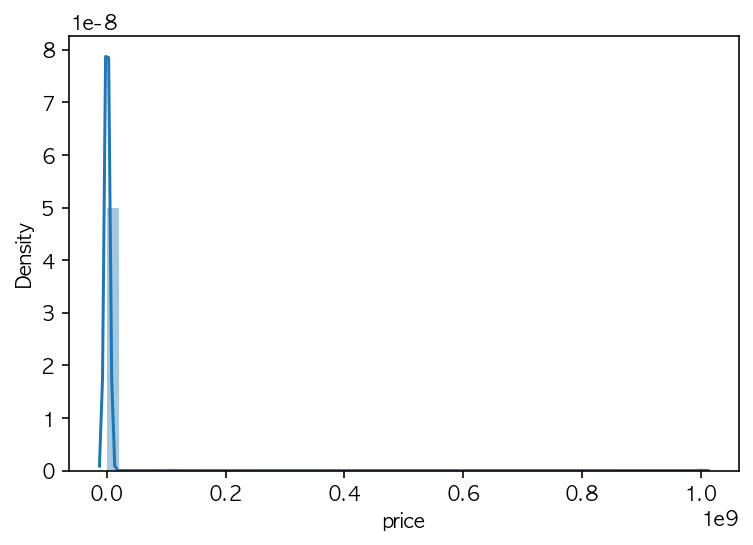

In [230]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

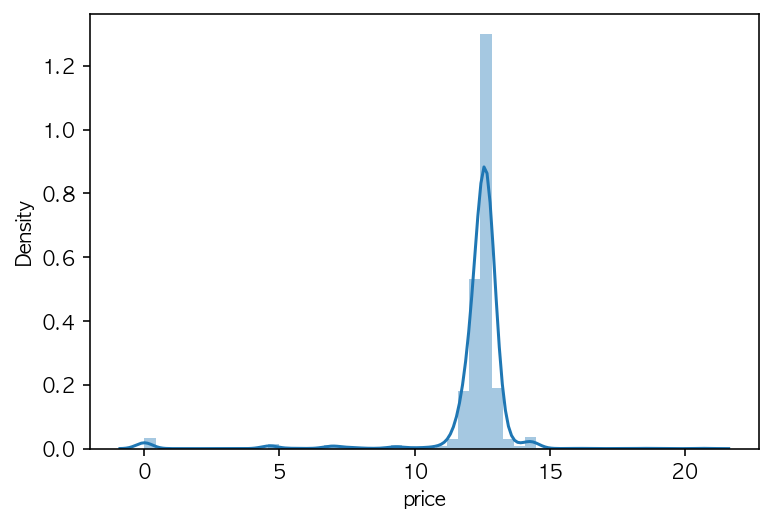

In [231]:
sns.distplot(np.log(df['price']+1))

#### 5.1.2 brand

In [232]:
df['brand'].value_counts()

나이키     3406
조던      2210
뉴발란스    1209
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='count'>

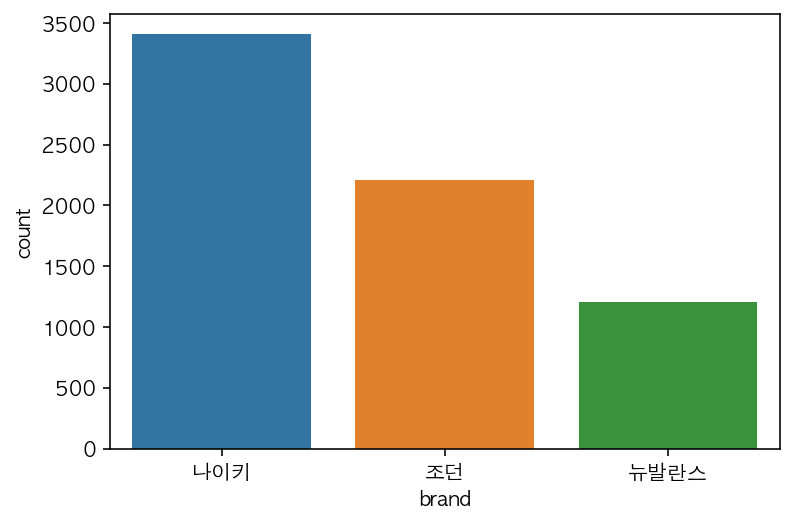

In [233]:
sns.countplot(df['brand'])

#### 5.1.3 product_type

In [234]:
df['product_type'].value_counts()

나이키 덩크로우    2845
조던1 하이      1007
뉴발란스 992     871
조던1 미드       685
나이키 덩크하이     561
조던 1 로우      518
뉴발란스 993     338
Name: product_type, dtype: int64

<AxesSubplot:xlabel='product_type', ylabel='count'>

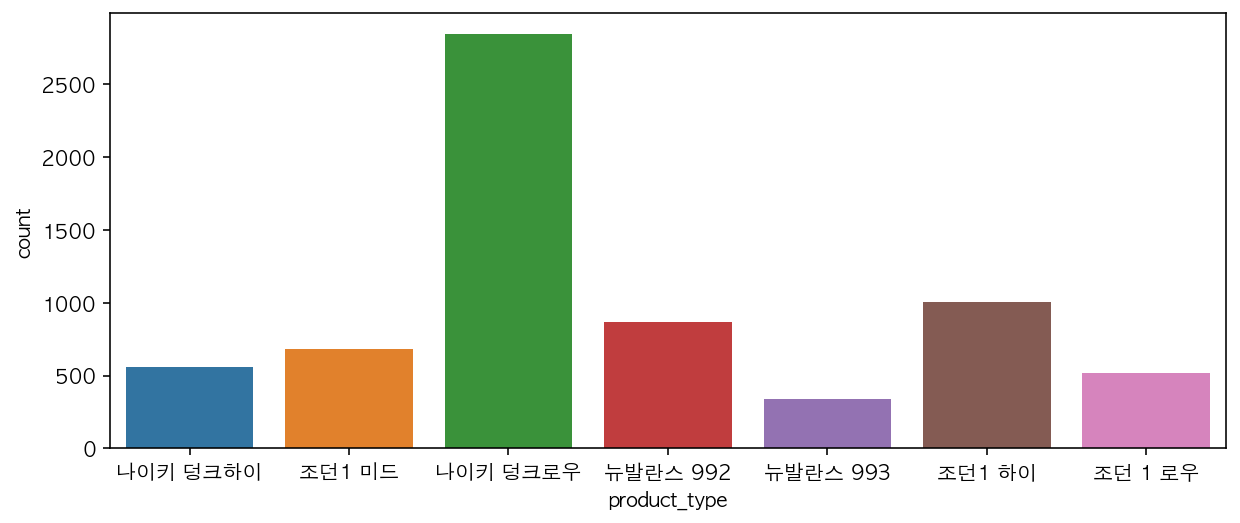

In [235]:
plt.figure(figsize=(10,4))
sns.countplot(df['product_type'])

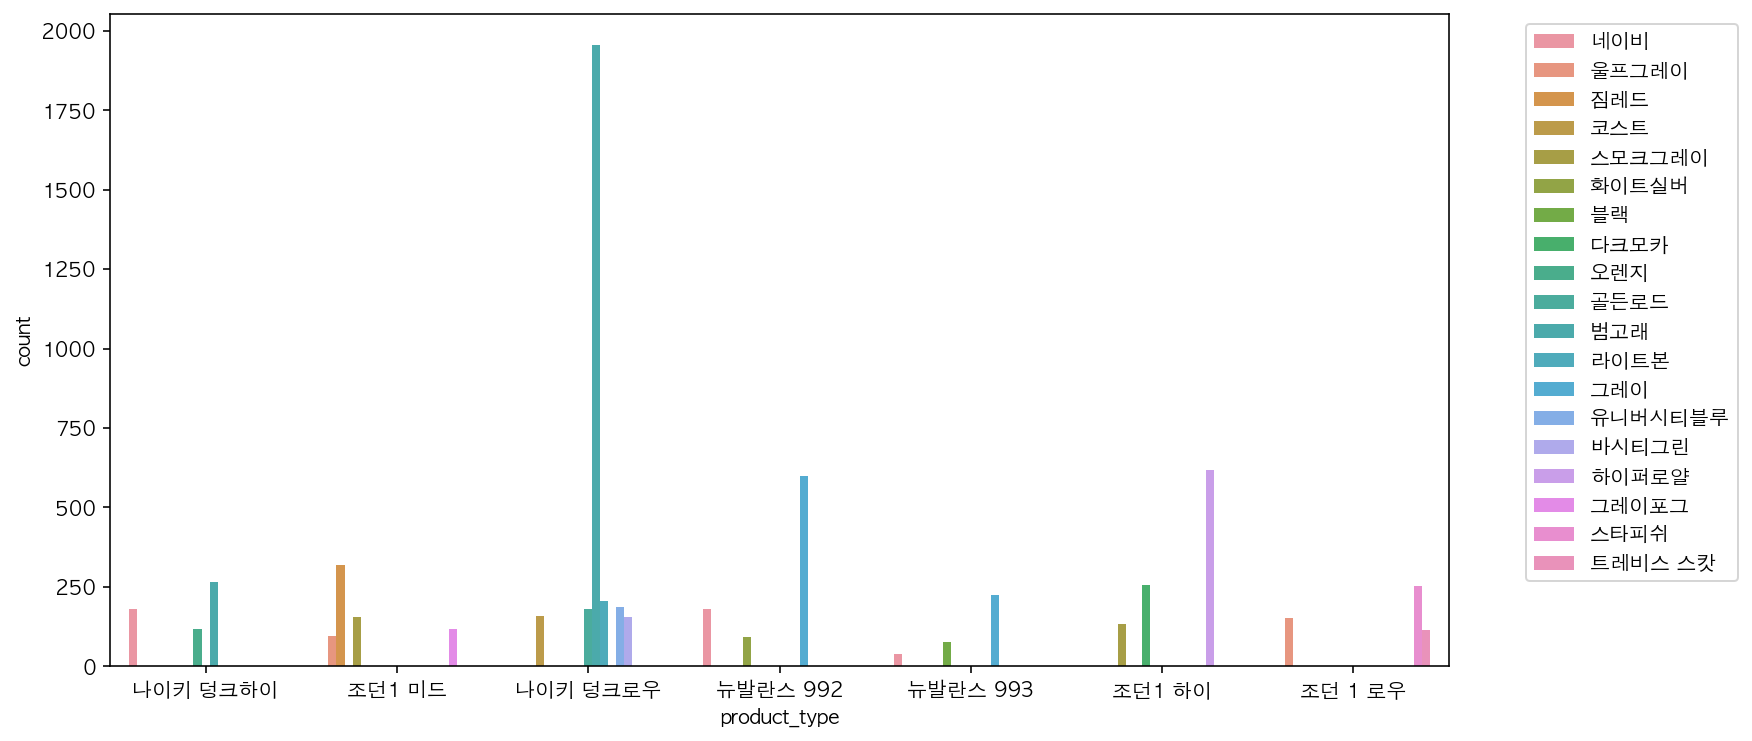

In [236]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='product_type', hue='color')
plt.legend(bbox_to_anchor=(1.05, 1))

#### 5.1.4 color

In [237]:
df['color'].value_counts()

범고래        2220
그레이         821
하이퍼로얄       618
네이비         399
짐레드         320
스모크그레이      288
다크모카        256
스타피쉬        253
울프그레이       245
라이트본        206
유니버시티블루     188
골든로드        181
코스트         159
바시티그린       156
그레이포그       116
오렌지         116
트레비스 스캇     114
화이트실버        92
블랙           77
Name: color, dtype: int64

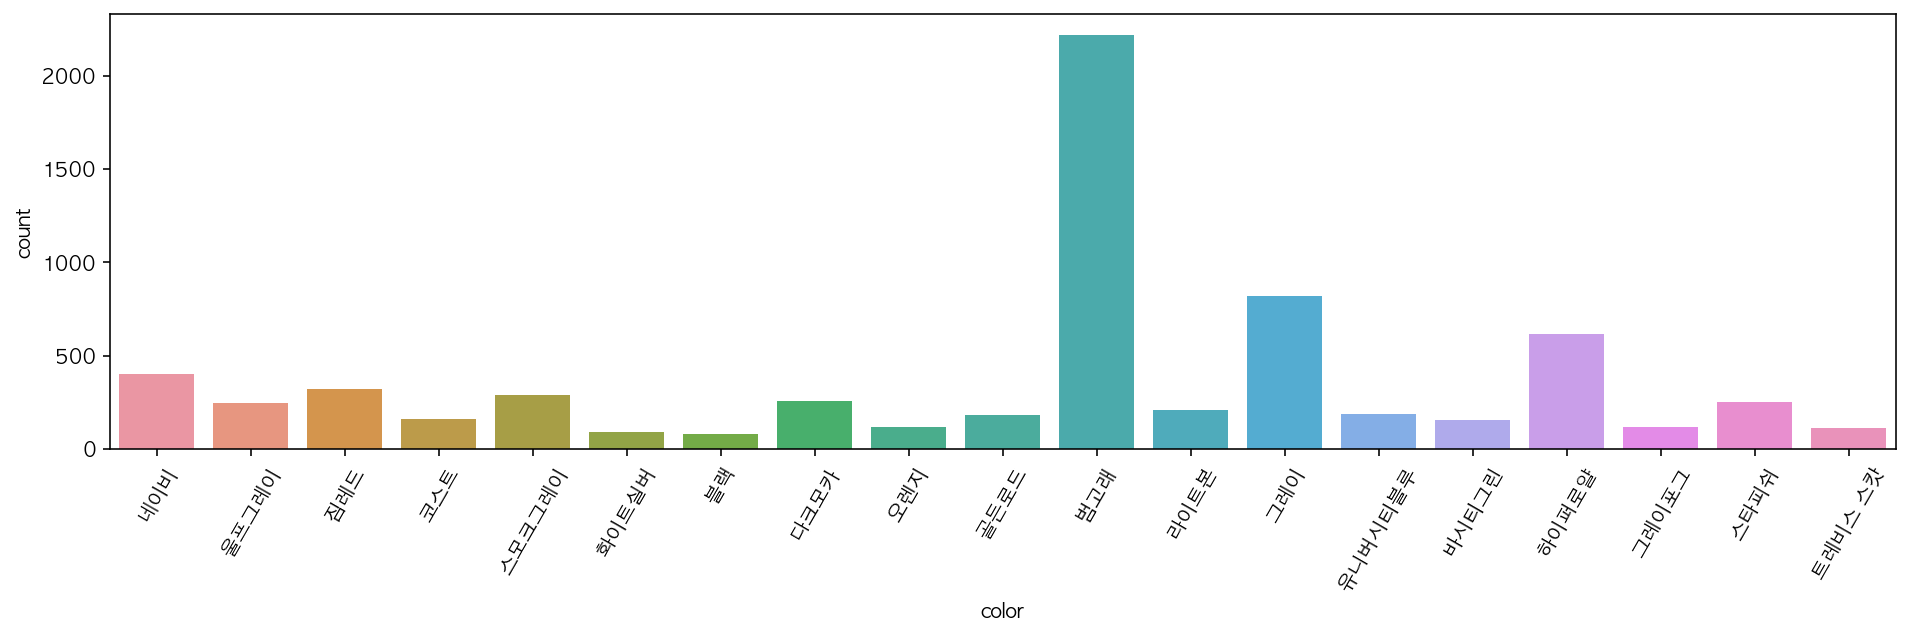

In [238]:
plt.figure(figsize=(16,4))
sns.countplot(df['color'])
plt.xticks(rotation=60)
plt.show()

#### 5.1.5 size

In [239]:
df['size'].value_counts()

270    899
265    725
275    704
260    679
280    543
240    505
235    448
250    433
230    352
255    346
245    341
285    276
290    210
225    144
220     66
295     51
300     49
0       24
210      9
310      7
200      5
215      3
305      3
320      1
325      1
330      1
Name: size, dtype: int64

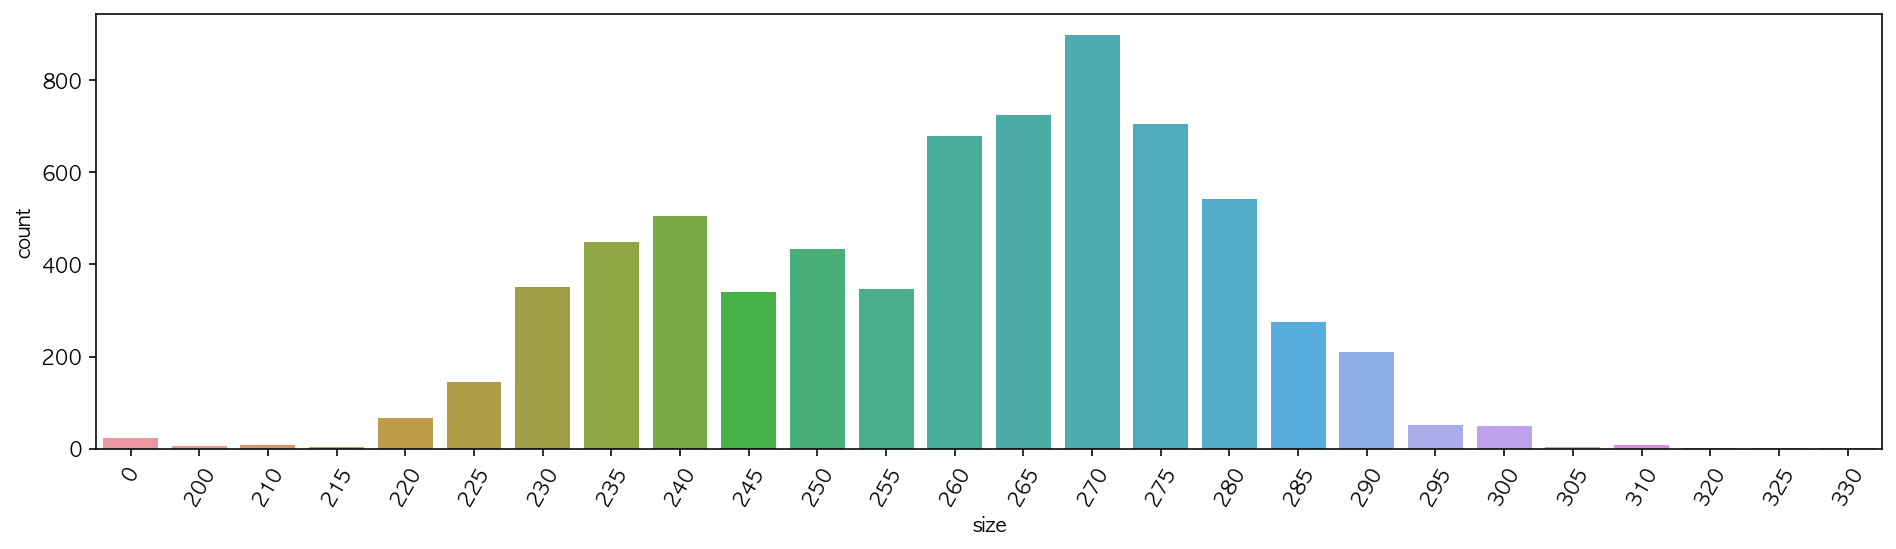

In [240]:
plt.figure(figsize=(16,4))
sns.countplot(df['size'])
plt.xticks(rotation=60)
plt.show()

#### 5.1.6 location1, location2

In [241]:
df['location1'].value_counts()

서울특별시                      1930
경기도                        1705
NUL                         771
인천광역시                       461
부산광역시                       420
대구광역시                       232
경상남도                        160
대전광역시                       156
충청남도                        150
광주광역시                       144
충청북도                        131
전라북도                        129
경상북도                        113
강원도                         108
울산광역시                        87
전라남도                         53
제주특별자치도                      37
세종특별자치시                      35
서울역(수도권1호선,4호선,경의선,공항철도       1
연신내역(수도권3호선,6호선               1
평택                            1
Name: location1, dtype: int64

In [242]:
df['location1'].value_counts().index

Index(['서울특별시', '경기도', 'NUL', '인천광역시', '부산광역시', '대구광역시', '경상남도', '대전광역시',
       '충청남도', '광주광역시', '충청북도', '전라북도', '경상북도', '강원도', '울산광역시', '전라남도',
       '제주특별자치도', '세종특별자치시', '서울역(수도권1호선,4호선,경의선,공항철도', '연신내역(수도권3호선,6호선',
       '평택'],
      dtype='object')

In [243]:
del1 = df[df['location1'] == '서울역(수도권1호선,4호선,경의선,공항철도'].index
del2 = df[df['location1'] == '연신내역(수도권3호선,6호선'].index

In [245]:
df.iloc[del2]

pid      uid  product_name brand product_type color size   price  \
5799  134730501  1291948  뉴발란스 993 그레이  뉴발란스     뉴발란스 993   그레이  260  469000   

      release_price             datetime       date        location1  \
5799         182700  2021-08-01 17:08:00 2021-08-01  연신내역(수도권3호선,6호선   

            location2 status used                       name  abnormal_price  
5799  연신내역(수도권3호선,6호선    판매중  새상품  [정품/새제품/260] 뉴발란스 993 그레이           False

In [255]:
df = df.drop(del1).reset_index(drop=True)
df = df.drop(del2).reset_index(drop=True)
print(df.shape)
df.tail(1)

(6821, 17)


pid      uid     product_name brand product_type    color size  \
6820  161653134  6165763  조던 1 로우 트레비스 스캇    조던      조던 1 로우  트레비스 스캇  260   

        price  release_price             datetime       date location1  \
6820  1800000         189000  2021-08-13 13:41:38 2021-08-13      전라남도   

     location2 status used               name  abnormal_price  
6820       여수시   판매완료   중고  조던1로우 260 트레비스 스캇           False

#### 5.1.7 status

In [256]:
df['status'].value_counts()

판매완료    4483
판매중     2031
예약완료     307
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

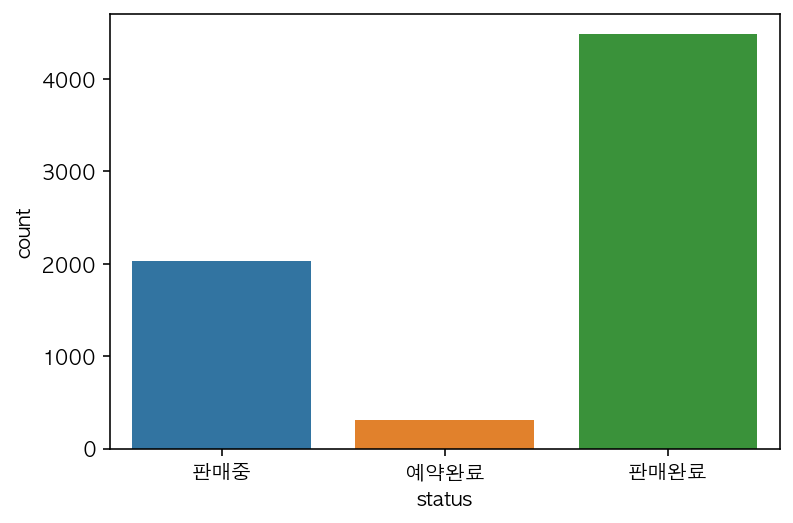

In [257]:
sns.countplot(df['status'])

<AxesSubplot:xlabel='brand', ylabel='count'>

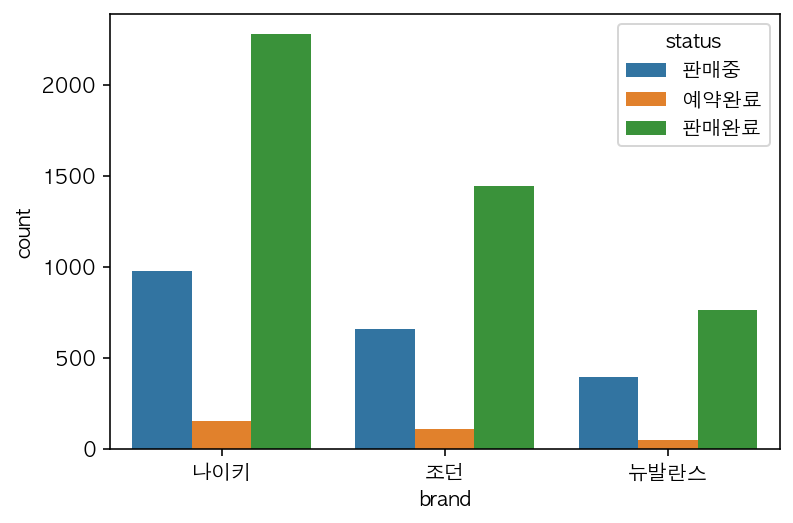

In [260]:
sns.countplot(data=df, x='brand', hue='status')

<AxesSubplot:xlabel='product_type', ylabel='count'>

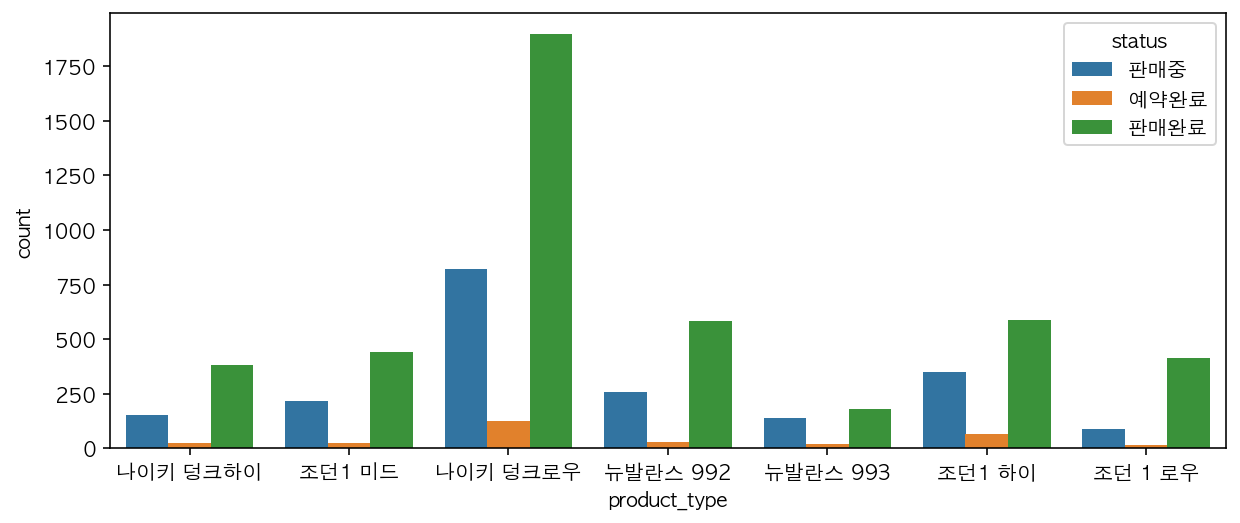

In [262]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='product_type', hue='status')

#### 5.1.8 used
- 판매자가 정확히 구분하여 올리는 것 같지 않다.

#### 5.1.9 uid

In [365]:
# 누가 가장 상품을 많이 올렸나
pd.pivot_table(df, index='uid', values='pid', aggfunc='count').sort_values(by='pid', ascending=False).head()

pid
uid          
7623840    56
9870858    18
7930580    18
76961884   14
10405026   13

In [366]:
# 7623840 유저가 제일 많이 상품 올림
df[df['uid'] == 7623840]['product_name'].value_counts()

나이키 덩크로우 코스트        13
나이키 덩크로우 범고래        13
조던1 미드 짐레드           6
뉴발란스 992 화이트실버       5
나이키 덩크하이 범고래         4
뉴발란스 992 네이비         4
나이키 덩크로우 유니버시티블루     2
조던1 하이 다크모카          2
조던1 미드 그레이포그         2
조던1 미드 울프그레이         2
조던1 하이 하이퍼로얄         1
나이키 덩크하이 오렌지         1
뉴발란스 992 그레이         1
Name: product_name, dtype: int64

In [367]:
# 7623840 유저는 상품은 많이 올렸는데 판매완료가 훨씬 적다
df[df['uid'] == 7623840]['status'].value_counts()

판매중     43
판매완료    13
Name: status, dtype: int64

In [368]:
# 7623840 유저는 군포사람, 예전 상품도 안팔린게 많음. 시세 반영을 다시 안하는듯.
df[(df['uid'] == 7623840) & (df['status'] == '판매중')].sort_values(by='date')

pid      uid      product_name brand product_type    color size  \
1088  138092205  7623840       조던1 하이 다크모카    조던       조던1 하이     다크모카  250   
643   142820695  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  235   
642   142784095  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  270   
4970  144610146  7623840      조던1 하이 하이퍼로얄    조던       조던1 하이    하이퍼로얄  260   
639   142566691  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  230   
638   143296294  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  245   
2161  148486126  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  255   
632   148299254  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  230   
2157  150158448  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  250   
2158  150158256  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  255   
630   150136568  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  235   
629   150129688  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  225   
628   150136445  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  240   
2136  153196499  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  255   
361   153025805  7623840        조던1 미드 짐레드    조던       조던1 미드      짐레드  260   
356   153194713  7623840        조던1 미드 짐레드    조던       조던1 미드      짐레드  255   
622   150129568  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  270   
621   150136378  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  265   
620   153196674  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  240   
350   154124432  7623840        조던1 미드 짐레드    조던       조던1 미드      짐레드  270   
606   160790853  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  245   
341   164733661  7623840        조던1 미드 짐레드    조던       조던1 미드      짐레드  270   
338   160890311  7623840        조던1 미드 짐레드    조던       조던1 미드      짐레드  260   
4372  158611171  7623840  나이키 덩크로우 유니버시티블루   나이키     나이키 덩크로우  유니버시티블루  270   
2075  166618816  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  235   
599   142862296  7623840      나이키 덩크로우 코스트   나이키     나이키 덩크로우      코스트  225   
4208  168733783  7623840      뉴발란스 992 네이비  뉴발란스     뉴발란스 992      네이비  270   
5712  167069142  7623840      나이키 덩크하이 범고래   나이키     나이키 덩크하이      범고래  240   
913   168290199  7623840    뉴발란스 992 화이트실버  뉴발란스     뉴발란스 992    화이트실버  270   
4206  168732752  7623840      뉴발란스 992 네이비  뉴발란스     뉴발란스 992      네이비  255   
912   168732565  7623840    뉴발란스 992 화이트실버  뉴발란스     뉴발란스 992    화이트실버  280   
1971  168937127  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  260   
4186  168090052  7623840      뉴발란스 992 네이비  뉴발란스     뉴발란스 992      네이비  260   
897   168819277  7623840    뉴발란스 992 화이트실버  뉴발란스     뉴발란스 992    화이트실버  260   
5957  168938048  7623840      조던1 미드 그레이포그    조던       조던1 미드    그레이포그  245   
886   168183470  7623840    뉴발란스 992 화이트실버  뉴발란스     뉴발란스 992    화이트실버  265   
885   168290124  7623840    뉴발란스 992 화이트실버  뉴발란스     뉴발란스 992    화이트실버  275   
4179  168733366  7623840      뉴발란스 992 네이비  뉴발란스     뉴발란스 992      네이비  230   
193   159632432  7623840      조던1 미드 울프그레이    조던       조던1 미드    울프그레이  240   
5947  169040490  7623840      조던1 미드 그레이포그    조던       조던1 미드    그레이포그  235   
5692  167069233  7623840      나이키 덩크하이 범고래   나이키     나이키 덩크하이      범고래  235   
5662  169625012  7623840      나이키 덩크하이 범고래   나이키     나이키 덩크하이      범고래  240   
1717  169414211  7623840      나이키 덩크로우 범고래   나이키     나이키 덩크로우      범고래  265   

       price  release_price             datetime       date location1  \
1088  599000         199000  2020-12-14 11:06:19 2020-12-14       경기도   
643   390000         119000  2021-02-02 10:07:03 2021-02-02       경기도   
642   450000         119000  2021-02-06 09:45:13 2021-02-06       경기도   
4970  149000         199000  2021-02-08 10:11:30 2021-02-08       경기도   
639   399000         119000  2021-02-18 11:13:49 2021-02-18       경기도   
638   390000         119000  2021-02-19 10:37:44 2021-02-19       경기도   
2161  390000         119

## 5.2 시각화1 - 브랜드별 분석 

### 5.2.1 나이키

In [1]:
# 제품별 df 프레임 구축 
df_n = df[df["brand"] == "나이키"]

NameError: name 'df' is not defined

In [ ]:
df_n.groupby("product_name")["price"].median()

In [ ]:
df_n.groupby("product_name")["release_price"].median()

In [ ]:
fig , ax  = plt.subplots()

ax.barh(df_n.groupby("product_name")["price"].median().sort_values(ascending =True).index, 
        df_n.groupby("product_name")["price"].median().sort_values(ascending =True).values, color ="black")


plt.show()

In [ ]:
fig , ax  = plt.subplots()

ax.barh(df_n.groupby("product_name")["release_price"].median().sort_values(ascending =True).index, 
       df_n.groupby("product_name")["release_price"].median().sort_values(ascending = True).values, color ="black")

df_n.groupby("product_name")["release_price"].median().sort_values(ascending =False)

In [ ]:
# 새상품 중고 상품 나누기 

df_n_new = df_n[df_n["used"]== 2 ] 
df_n_used = df_n[df_n["used"]== 1 ] 

In [ ]:
fig , ax  = plt.subplots(figsize = (10,8))

ax.barh(df_n.groupby("product_name")["price"].median().index, 
        df_n.groupby("product_name")["price"].median().values, label ="중고시장 가격", color ="black")

ax.barh(df_n.groupby("product_name")["release_price"].median().index, 
       df_n.groupby("product_name")["release_price"].median().values, label ="발매가", color = "gray")

plt.legend()
plt.show()


In [ ]:
sub = df_n.groupby("product_name")["price"].median() - df_n.groupby("product_name")["release_price"].median()

In [ ]:
df_n_new_sub = df_n_new.groupby("product_name")["price"].median() - df_n.groupby("product_name")["release_price"].median()
df_n_used_sub = df_n_used.groupby("product_name")["price"].median() - df_n.groupby("product_name")["release_price"].median()

In [ ]:
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["gold","yellow","green","gray","blue","skyblue","navy", "lightgray", "orange"]

ax.pie(x = sub, labels = df_n.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()

In [ ]:
fig , axes  = plt.subplots(2,1, figsize = (15,13))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["gold","yellow","green","gray","blue","skyblue","navy", "lightgray", "orange"]

axes[0].pie(x = df_n_new_sub,labels = df_n.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

axes[1].pie(x = df_n_used_sub, labels = df_n.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다


fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.tight_layout()
plt.show()

### 5.2.2 조던

In [ ]:
df_j = df[df["brand"]== "조던"] 

In [ ]:
df_j.groupby("product_name")["price"].median().sort_values(ascending =False)

In [ ]:
df_j.groupby("product_name")["release_price"].median().sort_values(ascending =False)

In [ ]:
fig , ax  = plt.subplots()

ax.barh(df_j.groupby("product_name")["price"].median().index, 
        df_j.groupby("product_name")["price"].median().values, color ="black")


plt.show()

In [ ]:
fig , ax  = plt.subplots(figsize = (10,8))

ax.barh(df_j.groupby("product_name")["price"].median().index, 
        df_j.groupby("product_name")["price"].median().values, label ="중고시장 가격", color ="black")

ax.barh(df_j.groupby("product_name")["release_price"].median().index, 
       df_j.groupby("product_name")["release_price"].median().values, label ="발매가", color = "gray")

plt.legend()
plt.show()


In [ ]:
sub_j = df_j.groupby("product_name")["price"].median().sort_values(ascending =False) - df_j.groupby("product_name")["release_price"].median().sort_values(ascending =False)

In [ ]:
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["yellow","gray","green","lightgray","blue","gold","green", "brown", "skyblue"]

ax.pie(x = sub_j, labels = df_j.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :15}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()

In [ ]:
# 새상품 중고 상품 나누기 

df_j_new = df_j[df_j["used"]== 2 ] 
df_j_used = df_j[df_j["used"]== 1 ] 

df_j_new_sub = df_j_new.groupby("product_name")["price"].median() - df_j.groupby("product_name")["release_price"].median()
df_j_used_sub = df_j_used.groupby("product_name")["price"].median() - df_j.groupby("product_name")["release_price"].median()

In [ ]:
fig , axes  = plt.subplots(2,1, figsize = (13,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["yellow","gray","green","lightgray","blue","gold","green", "brown", "skyblue"]


axes[0].pie(x = df_j_new_sub,labels = df_j.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :13}, colors = colors)

axes[1].pie(x = df_j_used_sub, labels = df_j.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :12}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다


fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.tight_layout()
plt.show()

### 5.2.3 뉴발란스

In [ ]:
df_b = df[df["brand"]== "뉴발란스"]

In [ ]:
df_b.groupby("product_name")["price"].median().sort_values(ascending =False)

In [ ]:
df_b.groupby("product_name")["release_price"].median().sort_values(ascending =False)

In [ ]:
sub_b = df_b.groupby("product_name")["price"].median()- df_b.groupby("product_name")["release_price"].median()

In [ ]:
fig , ax  = plt.subplots()

ax.barh(df_b.groupby("product_name")["price"].median().index, 
        df_b.groupby("product_name")["price"].median().values, color ="black")


plt.show()

In [ ]:
fig , ax  = plt.subplots(figsize = (10,8))

ax.barh(df_b.groupby("product_name")["price"].median().index, 
        df_b.groupby("product_name")["price"].median().values, label ="중고시장 가격", color ="black")

ax.barh(df_b.groupby("product_name")["release_price"].median().index, 
       df_b.groupby("product_name")["release_price"].median().values, label ="발매가", color ="gray")

plt.legend()
plt.show()


In [ ]:
df_b_new = df_b[df_b["used"]== 2 ] 
df_b_used = df_b[df_b["used"]== 1 ] 

In [ ]:
display(df_b_used.groupby("product_name")["price"].median().sort_values(ascending =False),df_b_new.groupby("product_name")["price"].median().sort_values(ascending =False))

In [ ]:
df_b_new_sub = df_b_new.groupby("product_name")["price"].median() - df_b.groupby("product_name")["release_price"].median()
df_b_used_sub = df_b_used.groupby("product_name")["price"].median() - df_b.groupby("product_name")["release_price"].median() 

In [ ]:
fig , ax = plt.subplots(figsize = (13,10))

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ["gray","skyblue","lightgray","silver","gray","skyblue","lightgray", "brown", "skyblue"]

ax.pie(x = df_b_new_sub, labels = df_b.groupby("product_name")["price"].median().index, autopct='%.1f%%'
      , startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :15}, colors = colors)



# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.show()

In [8]:
plt.figure

NameError: name 'plt' is not defined

In [9]:
fig , ax = plt.subplots(figsize = (10,8))

ax.bar(df_b_used_sub.index,df_b_used_sub.values, color ="black")
plt.xticks(rotation =45)
ax.set_title
ax.set_xticks
fig.tight_layout()
plt.show()

NameError: name 'plt' is not defined

## 5.3 시각화2 - 시세 분석

### 5.3.1 date와 price와 관계 살펴보기
- 시세차트는 정상적인 가격범위를 갖는 normal_price 데이터프레임을 뽑아서 사용한다

In [269]:
# normal price만 추출하여 df생성
normal_price = df[df['abnormal_price'] == False].reset_index(drop=True)

In [270]:
normal_price['price'].describe()

count      6529
mean     311549
std      203589
min       10000
25%      230000
50%      295000
75%      340000
max     3590000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

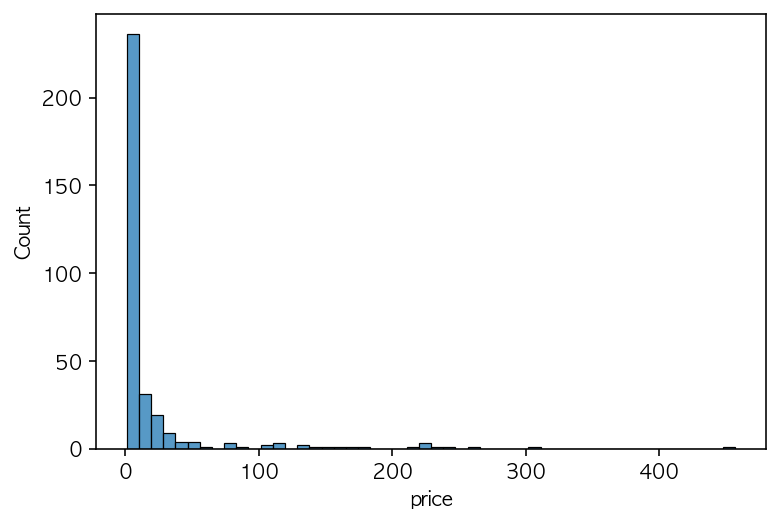

In [271]:
sns.histplot(normal_price['price'].value_counts(), bins=50)

In [272]:
# 5프로 잘라서 이상치 제거해본다.
lower = int(len(normal_price) * 0.025)
upper = int(len(normal_price) * 0.975)

In [273]:
test = normal_price.sort_values(by='price')[lower:upper]

### 5.3.2 시각화 함수 만들기
- **brand, product_type, color, used 별 날짜에 따른 가격변화**
- [ ] 브랜드별 시세추이 살펴보기
- [ ] 동일 브랜드 내에서 색상별 시세추이 살펴보기
- [ ] 동일 브랜드 내에서 제품 유형별 시세추이 살펴보기
- [ ] 동일 제품에서 used(중고/새상품) 시세추이 살펴보기
- [ ] release_price 가로선 긋기
- [ ] 시세추이 살펴볼 수 있는 모듈 만들기
- [ ] uid 동일판매자 살펴보기
- [ ] 사이즈별 가격 분포 살펴보기(히트맵)
- [ ] status = 올린시점으로부터 가장 빨리 팔린 상품은 무엇인지 살펴보기 (판매완료, 예약완료)

In [274]:
df = test

#### 5.3.2.1 브랜드별 시세추이 살펴보기

In [275]:
df['brand'].value_counts()

나이키     3212
조던      1903
뉴발란스    1087
Name: brand, dtype: int64

In [276]:
# 브랜드별 가격통계 살펴보기
pd.pivot_table(df, index='brand', values='price', aggfunc=['max', 'mean', 'median', 'min', 'std'])

max   mean  median     min    std
        price  price   price   price  price
brand                                      
나이키    550000 282664  290000  120000  68420
뉴발란스   485000 291055  299000  120000  71710
조던     650000 301112  300000  120000 104239

In [ ]:
# # 원하는 데이터 뽑기(제품유형/브랜드/색상/중고여부)
# df = test[test['brand'] == '나이키'].reset_index(drop=True)
# print(df.shape)
# df.head(1)

In [278]:
# 원하는 분류 columns에 넣기 (brand/product_type/color/used)
# 해당날짜에 판매기록이 없으면 NaN으로 표시됨.
# aggfunc에서 median(중앙값-이상치에 덜 영향), mean(평균), count(몇개인지 보기위함)
pivot_df = pd.pivot_table(df, index='date', columns='brand', values='price', aggfunc=['median','mean','count']).sort_index()
print(pivot_df.shape)
pivot_df.head()

(279, 9)


median               mean               count         
brand         나이키   뉴발란스     조던  나이키   뉴발란스     조던   나이키 뉴발란스  조던
date                                                             
2020-11-13    NaN    NaN 400000  NaN    NaN 400000   NaN  NaN   2
2020-11-16    NaN    NaN 449000  NaN    NaN 449000   NaN  NaN   1
2020-11-26    NaN 150000    NaN  NaN 150000    NaN   NaN    1 NaN
2020-11-28    NaN    NaN 379000  NaN    NaN 379000   NaN  NaN   1
2020-12-11    NaN 245000    NaN  NaN 245000    NaN   NaN    2 NaN

In [279]:
column_list = pivot_df['mean'].columns

In [280]:
column_list

Index(['나이키', '뉴발란스', '조던'], dtype='object', name='brand')

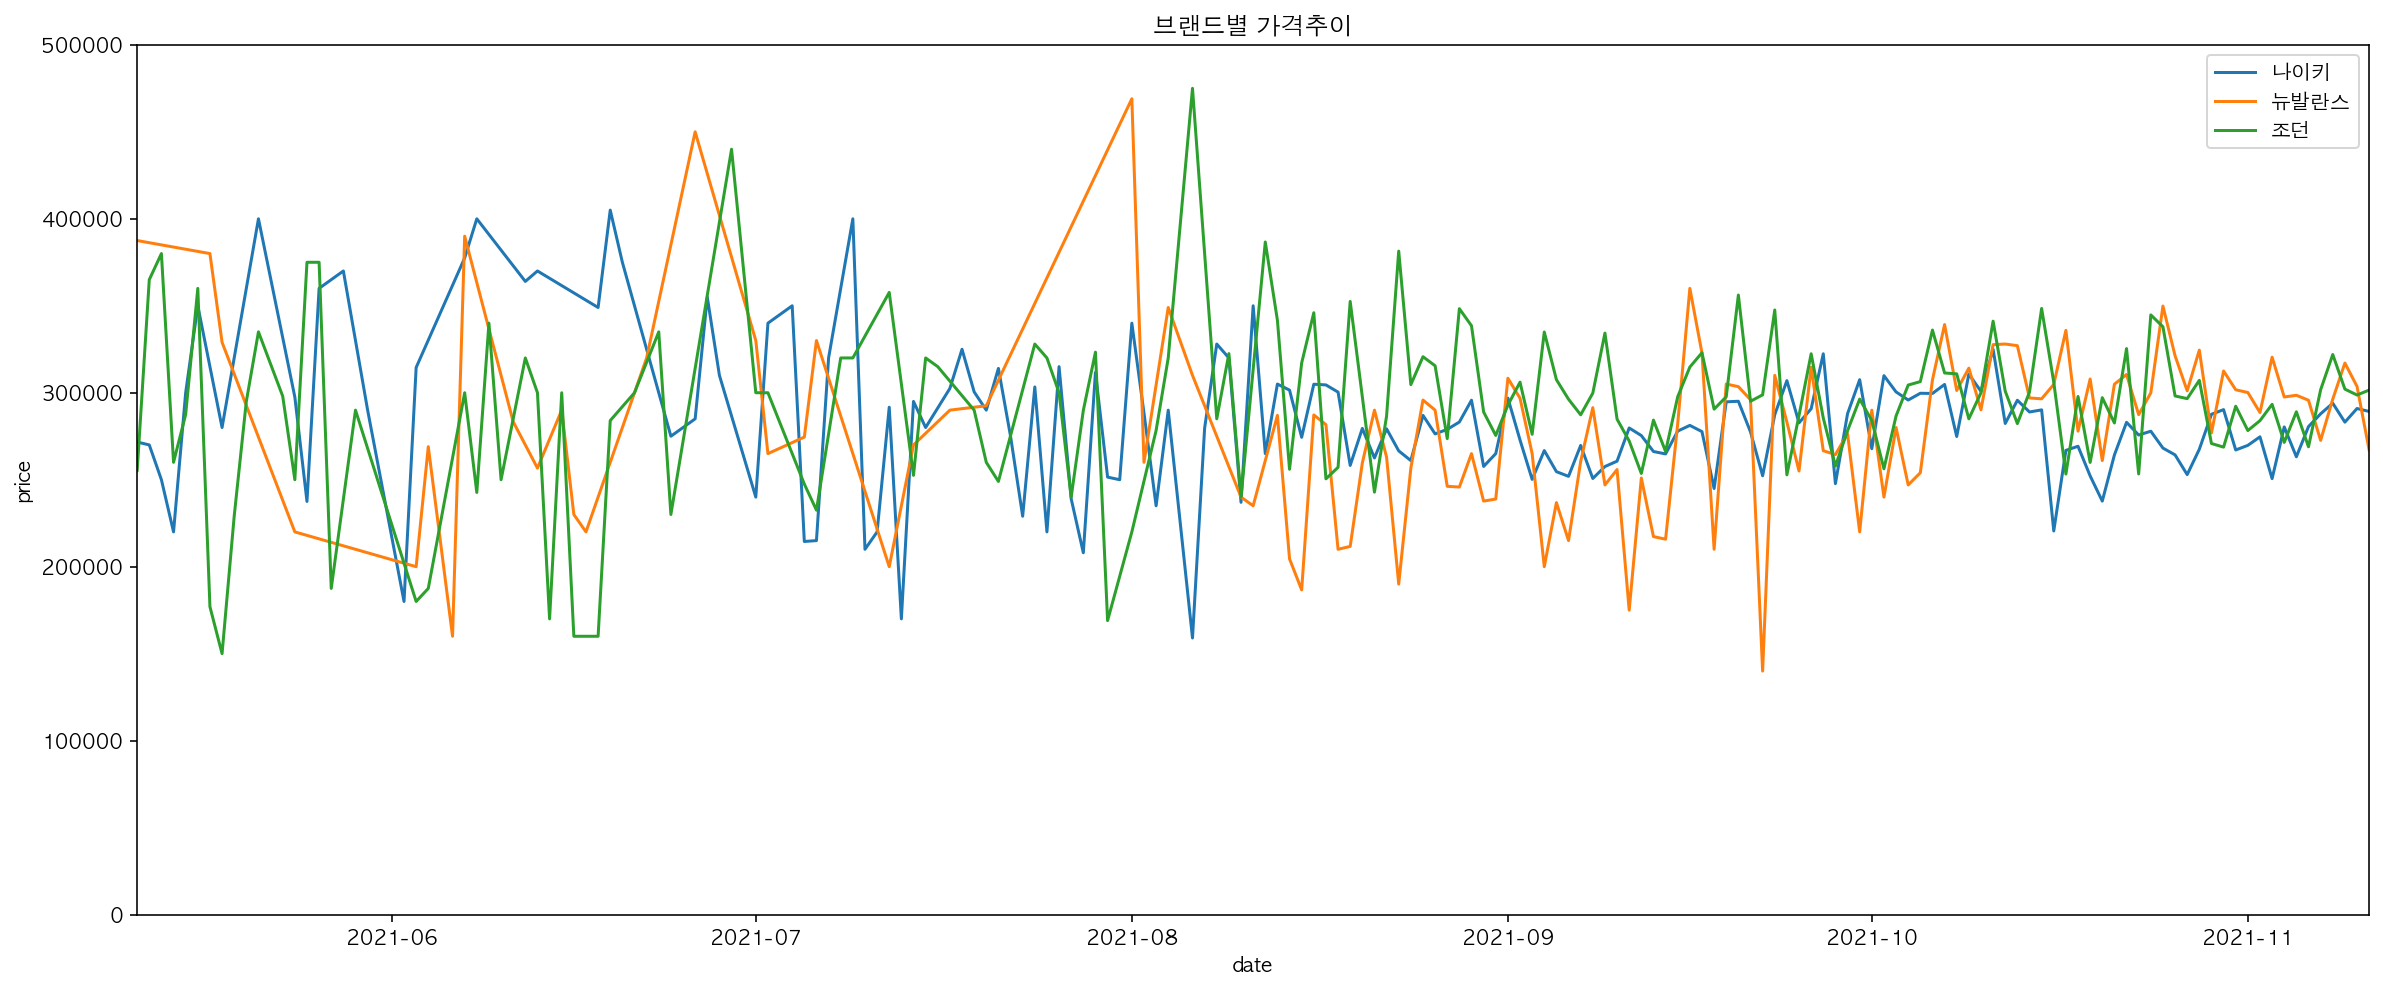

In [282]:
# median을 사용하는 이유는 이상치의 영향을 덜 받기 때문.
# 이상치를 제거했기에 mean을 사용해도 됨. (더 자연스러운 그래프를 위해)
# 시각화 함수 선언
# def make_lineplot(column_list):
plt.figure(figsize=(20,8))
for col in column_list:
    sns.lineplot(data=pivot_df['mean'], x=pivot_df['mean'].index, y=pivot_df['mean'][col], label=col)
plt.title('브랜드별 가격추이')
plt.xlabel('date')
plt.ylabel('price')
plt.ylim([0,500000])
plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

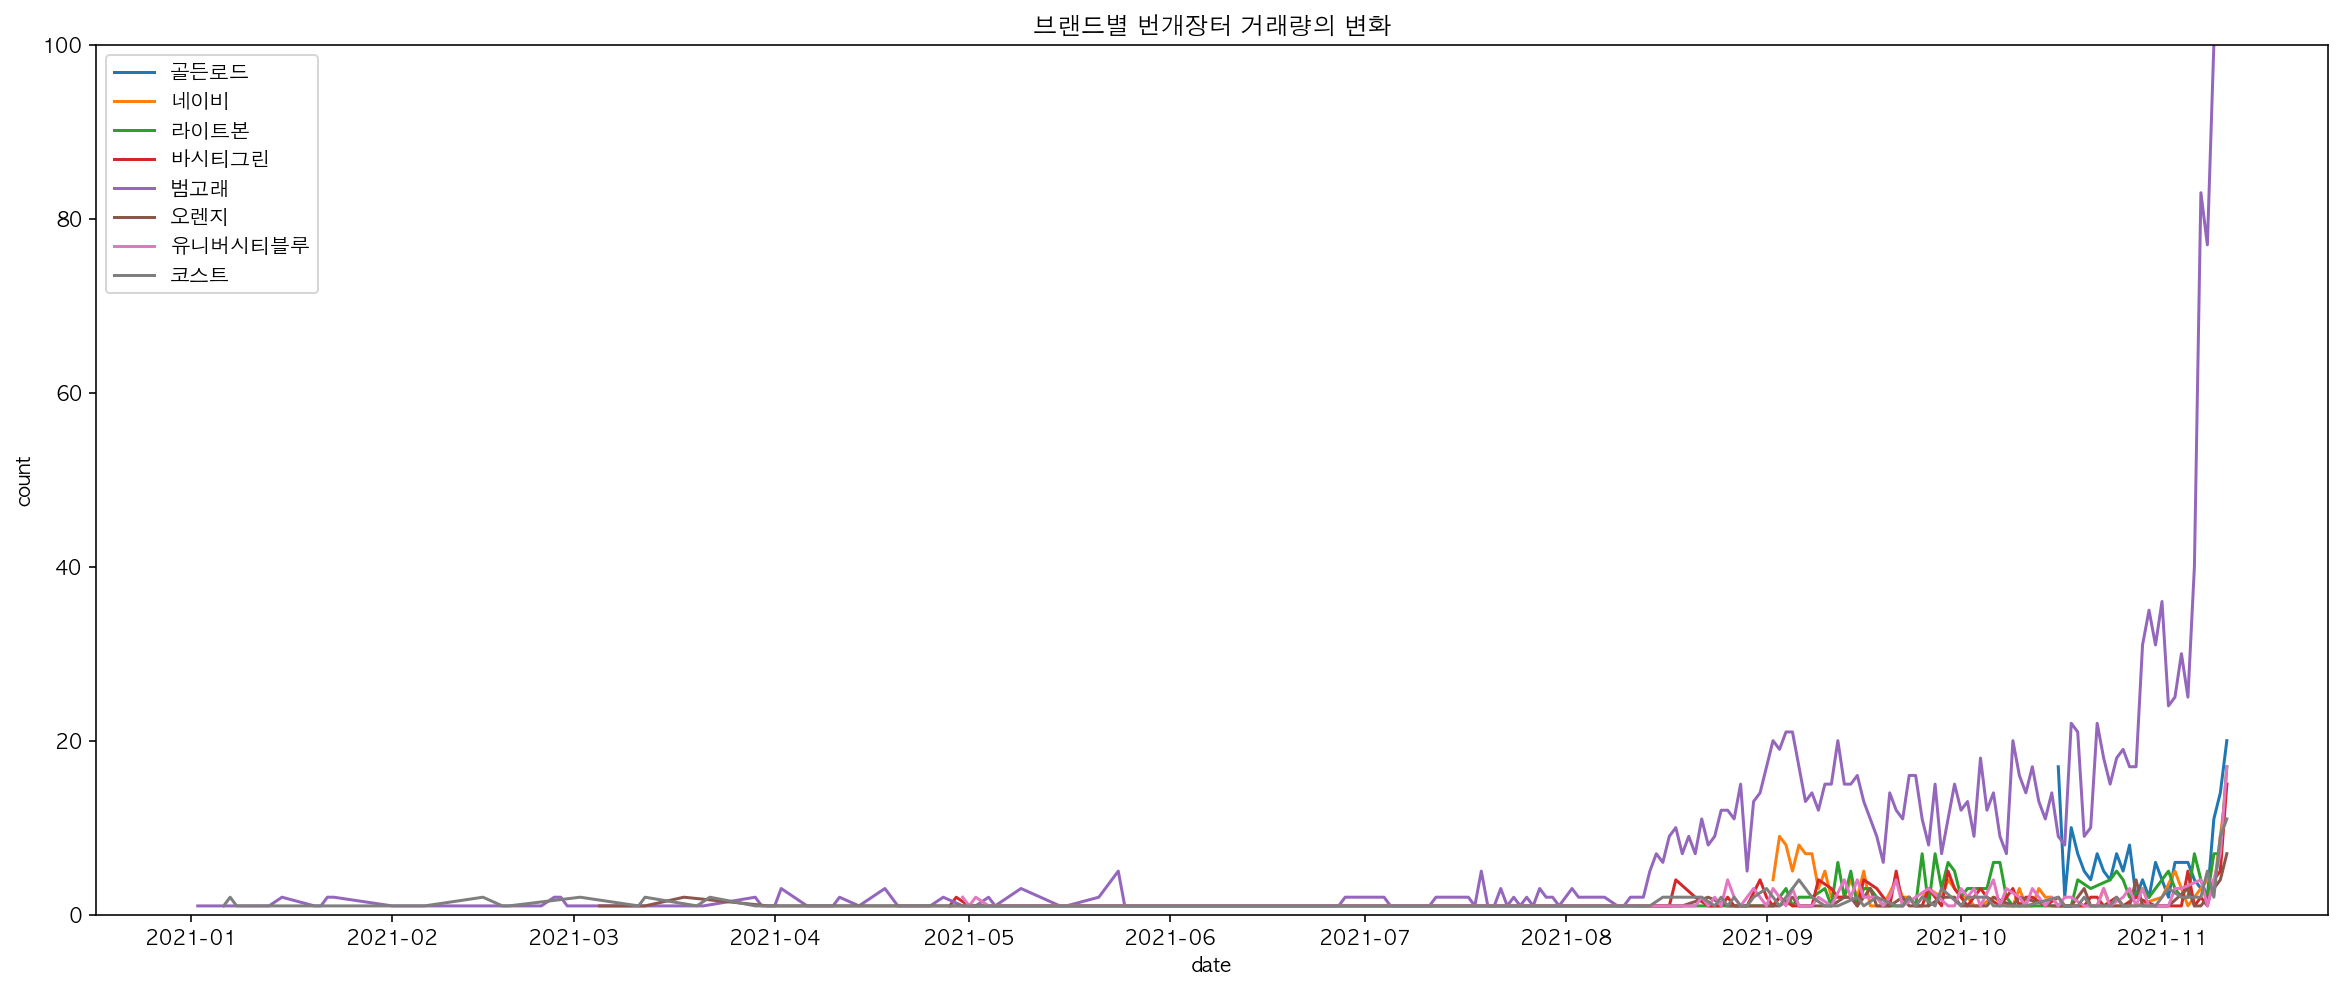

In [290]:
# 거래량의 변화
plt.figure(figsize=(20,8))
for col in column_list:
    sns.lineplot(data=pivot_df['count'], x=pivot_df['count'].index, y=pivot_df['count'][col], label=col)
plt.title('브랜드별 번개장터 거래량의 변화')
plt.xlabel('date')
plt.ylabel('count')
plt.ylim([0,100])
# plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

#### 5.3.2.2 동일 브랜드 내 색상별 시세 변화

In [285]:
df[df['brand']=='나이키']['color'].value_counts()

범고래        2090
라이트본        191
유니버시티블루     179
네이비         174
골든로드        173
코스트         150
바시티그린       150
오렌지         105
Name: color, dtype: int64

In [286]:
# 가격통계 살펴보기
pd.pivot_table(df[df['brand']=='나이키'], index='color', values='price', aggfunc=['max', 'mean', 'median', 'min', 'std'])

max   mean  median     min   std
          price  price   price   price price
color                                       
골든로드     280000 161254  159000  120000 22312
네이비      399000 202103  199500  129000 36483
라이트본     350000 265932  265000  160000 31001
바시티그린    529000 311813  305000  180000 62717
범고래      550000 304154  302000  120000 54508
오렌지      300000 179429  180000  120000 41927
유니버시티블루  400000 253637  250000  120000 55634
코스트      519000 315780  320000  140000 70801

In [287]:
# 나이키 브랜드의 색상별 시세 변화
# aggfunc에서 median(중앙값-이상치에 덜 영향), mean(평균), count(몇개인지 보기위함)
pivot_df = pd.pivot_table(df[df['brand']=='나이키'], index='date', columns='color', values='price', aggfunc=['median','mean','count']).sort_index()
print(pivot_df.shape)
pivot_df.head()

(225, 24)


median                                          mean           \
color        골든로드 네이비 라이트본 바시티그린    범고래 오렌지 유니버시티블루    코스트 골든로드 네이비 라이트본   
date                                                                       
2021-01-02    NaN NaN  NaN   NaN 500000 NaN     NaN    NaN  NaN NaN  NaN   
2021-01-04    NaN NaN  NaN   NaN 230000 NaN     NaN    NaN  NaN NaN  NaN   
2021-01-06    NaN NaN  NaN   NaN 400000 NaN     NaN 400000  NaN NaN  NaN   
2021-01-07    NaN NaN  NaN   NaN 418000 NaN     NaN 390000  NaN NaN  NaN   
2021-01-08    NaN NaN  NaN   NaN 330000 NaN     NaN 420000  NaN NaN  NaN   

                                           count                         \
color      바시티그린    범고래 오렌지 유니버시티블루    코스트  골든로드 네이비 라이트본 바시티그린 범고래 오렌지   
date                                                                      
2021-01-02   NaN 500000 NaN     NaN    NaN   NaN NaN  NaN   NaN   1 NaN   
2021-01-04   NaN 230000 NaN     NaN    NaN   NaN NaN  NaN   NaN   1 NaN   
2021-01-06   NaN 400000 NaN     NaN 400000   NaN NaN  NaN   NaN   1 NaN   
2021-01-07   NaN 418000 NaN     NaN 390000   NaN NaN  NaN   NaN   1 NaN   
2021-01-08   NaN 330000 NaN     NaN 420000   NaN NaN  NaN   NaN   1 NaN   

                        
color      유니버시티블루 코스트  
date                    
2021-01-02     NaN NaN  
2021-01-04     NaN NaN  
2021-01-06     NaN   1  
2021-01-07     NaN   2  
2021-01-08     NaN   1

In [288]:
column_list = pivot_df['mean'].columns
column_list

Index(['골든로드', '네이비', '라이트본', '바시티그린', '범고래', '오렌지', '유니버시티블루', '코스트'], dtype='object', name='color')

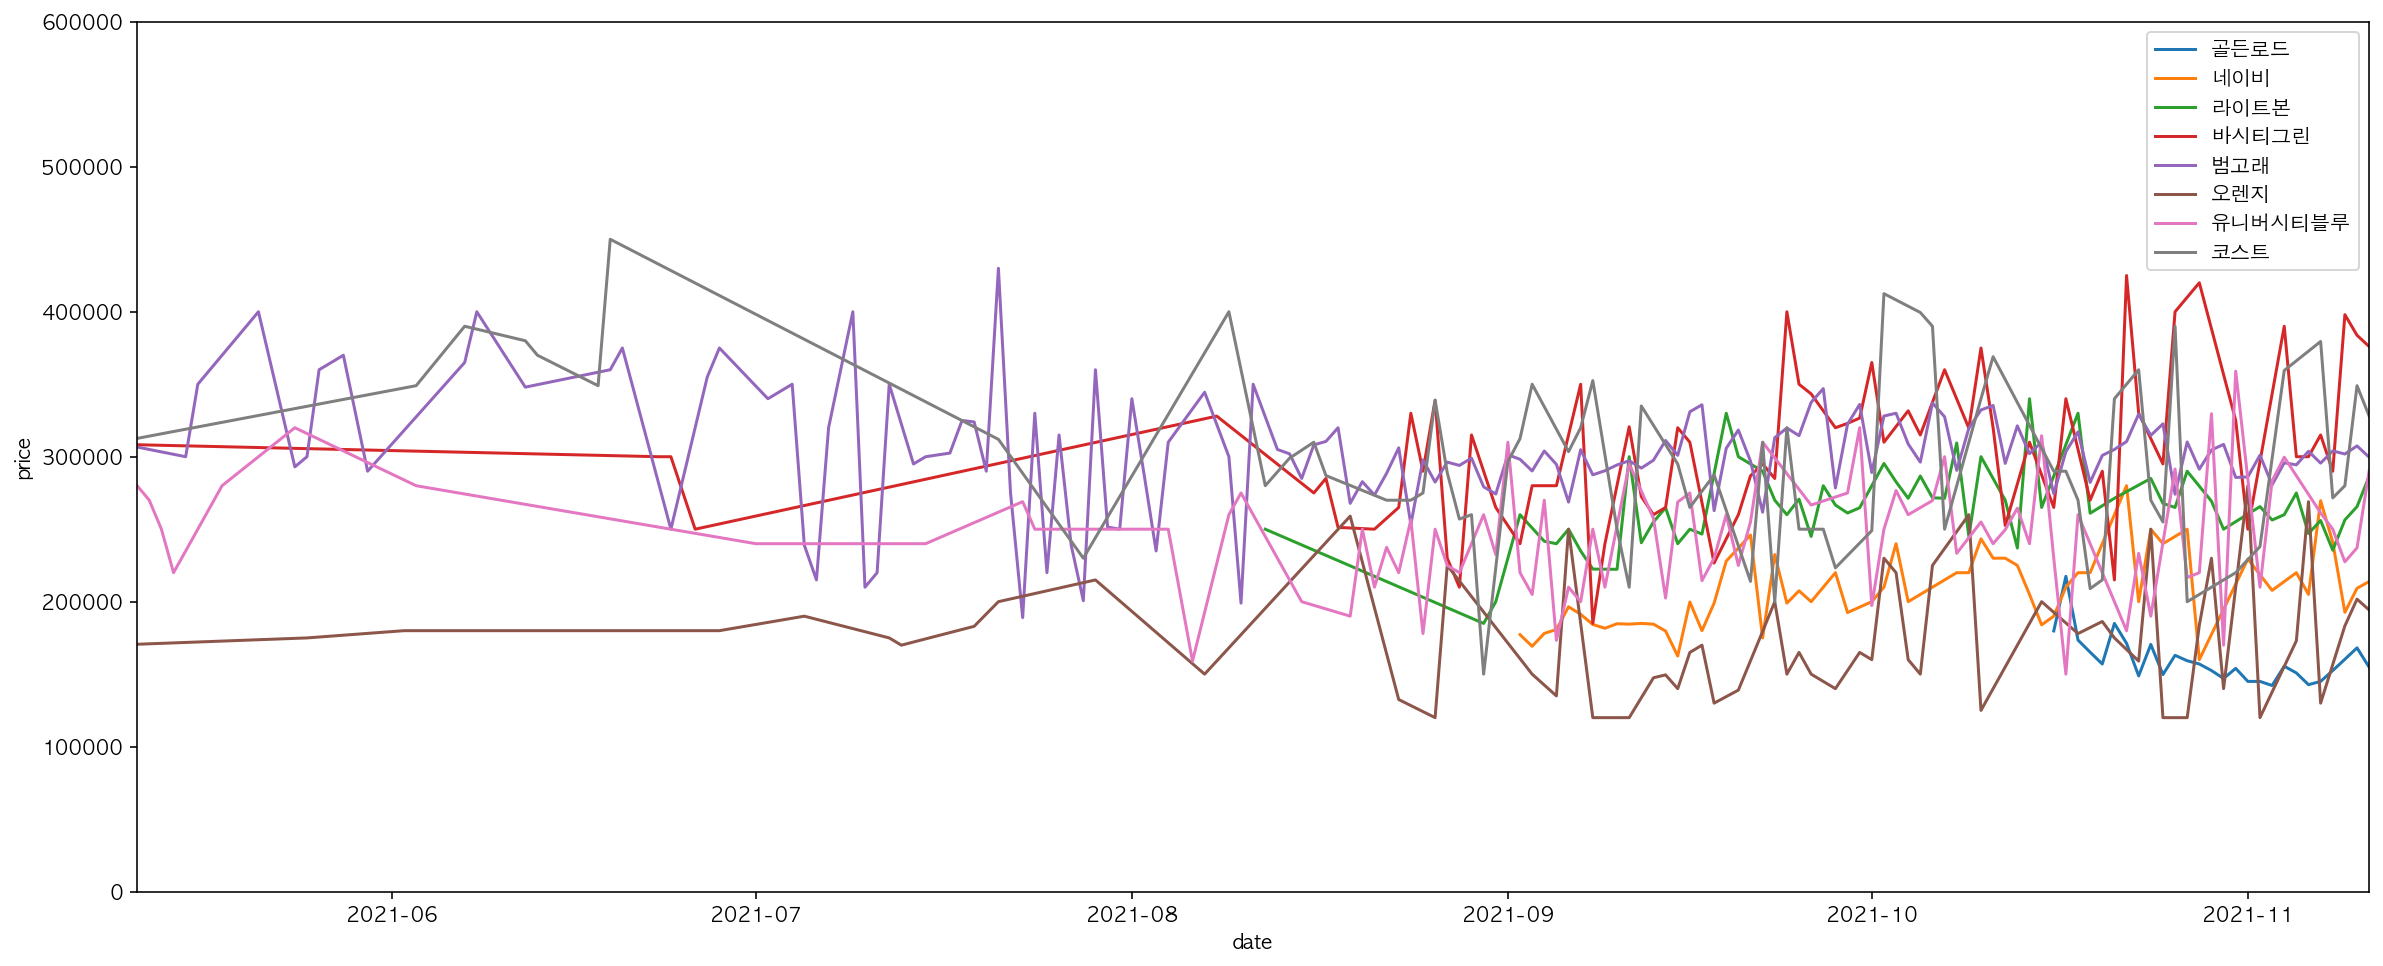

In [289]:
plt.figure(figsize=(20,8))
for col in column_list:
    sns.lineplot(data=pivot_df['mean'], x=pivot_df['mean'].index, y=pivot_df['mean'][col], label=col, markers=True, markersize=14)
plt.title('나이키의 색상별 가격변화')
plt.xlabel('date')
plt.ylabel('price')
plt.ylim([0,600000])
plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

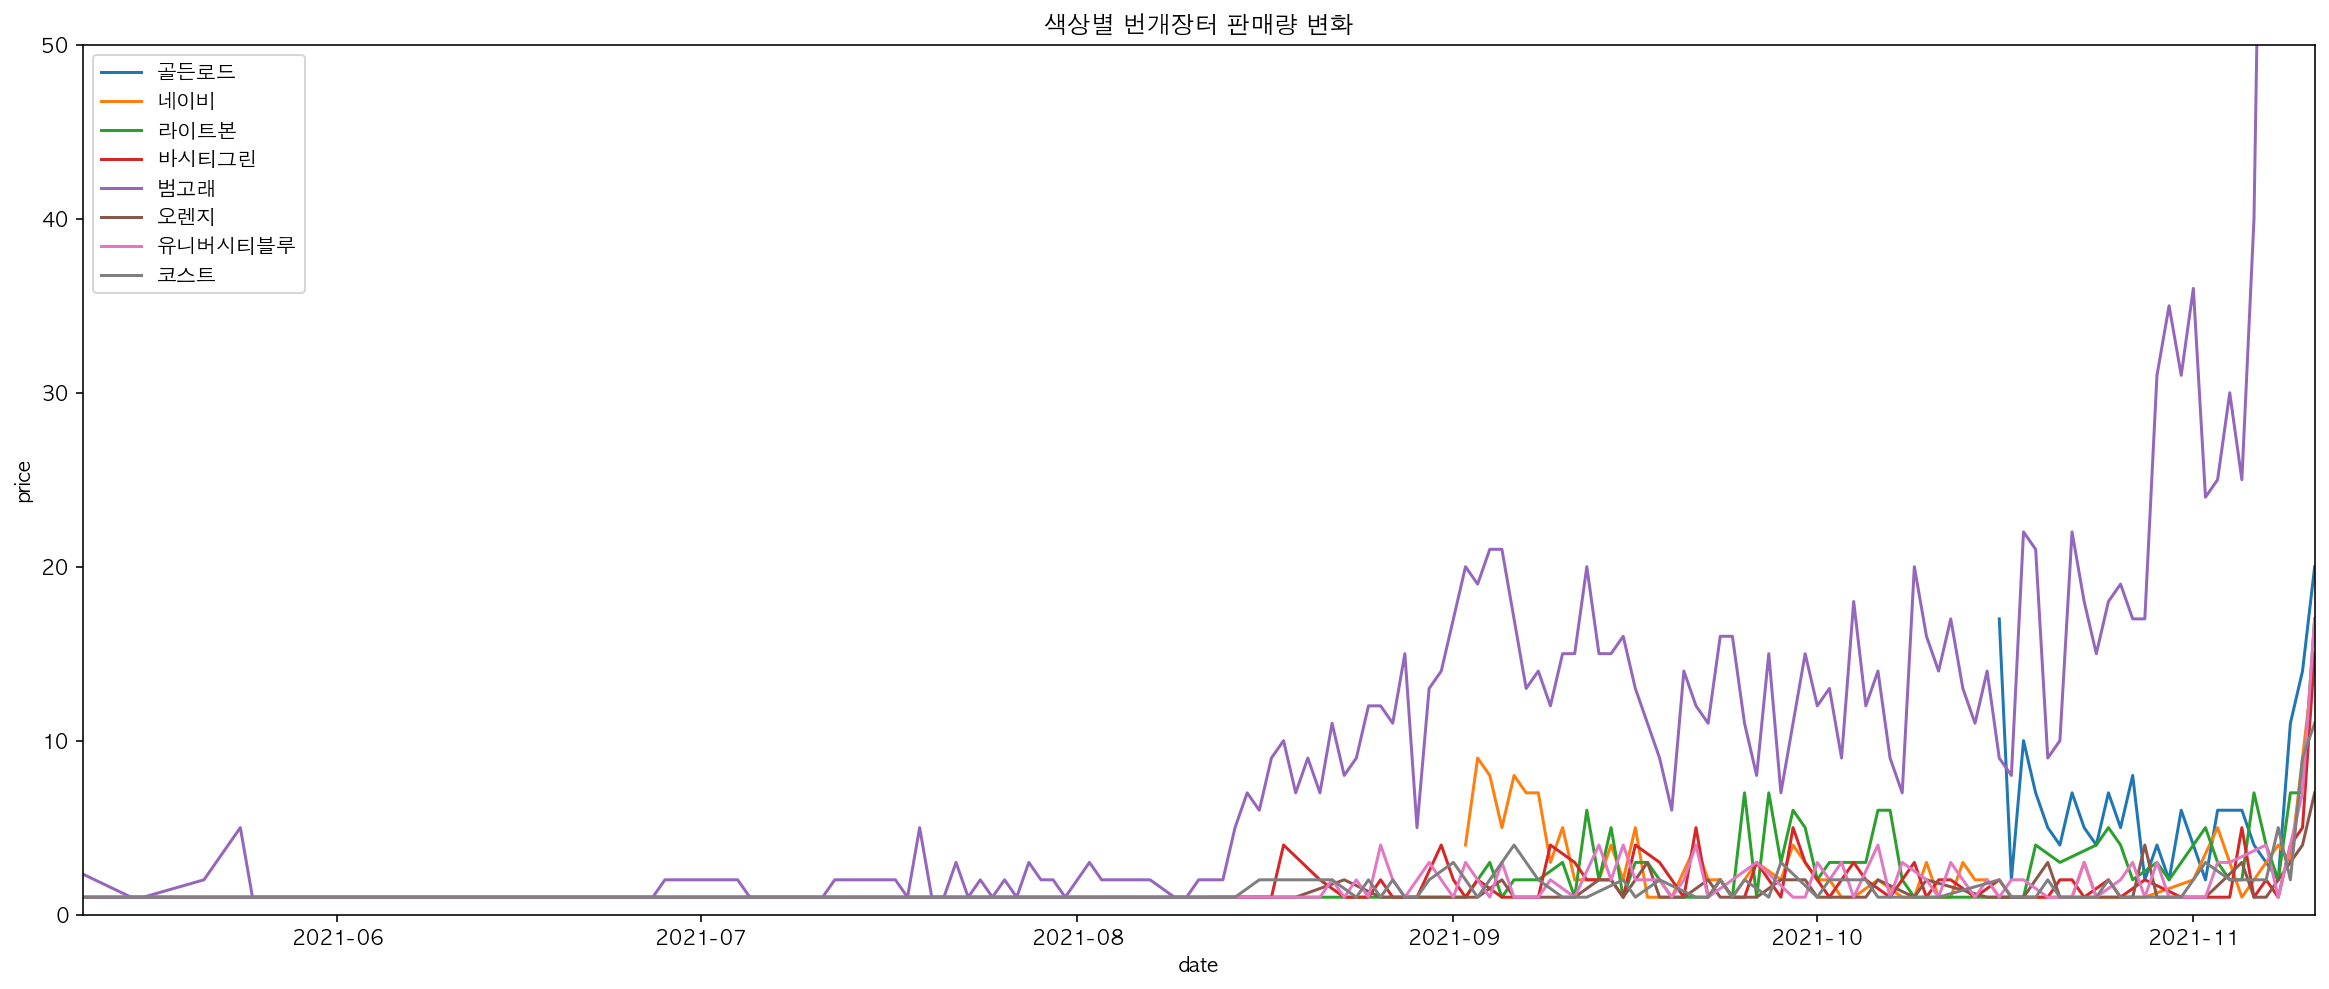

In [294]:
plt.figure(figsize=(20,8))
for col in column_list:
    sns.lineplot(data=pivot_df['count'], x=pivot_df['count'].index, y=pivot_df['count'][col], label=col)
plt.title('색상별 번개장터 판매량 변화')
plt.xlabel('date')
plt.ylabel('price')
plt.ylim([0,50])
plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

#### 5.3.2.3 동일 브랜드 내에서 제품 유형별 시세추이 살펴보기

In [295]:
df[df['brand']=='조던']['product_type'].value_counts()

조던1 하이     899
조던1 미드     614
조던 1 로우    390
Name: product_type, dtype: int64

In [296]:
# 가격통계 살펴보기
pd.pivot_table(df[df['brand']=='조던'], index='product_type', values='price', aggfunc=['max', 'mean', 'median', 'min', 'std'])

max   mean  median     min    std
               price  price   price   price  price
product_type                                      
조던 1 로우       450000 302718  300000  170000  37885
조던1 미드        649000 261277  260000  120000 101478
조던1 하이        650000 327623  320000  120000 116505

In [297]:
# 조던 브랜드의 제품타입별 시세 변화
# aggfunc에서 median(중앙값-이상치에 덜 영향), mean(평균), count(몇개인지 보기위함)
pivot_df = pd.pivot_table(df[df['brand']=='조던'], index='date', columns='product_type', values='price', aggfunc=['median','mean','count']).sort_index()
print(pivot_df.shape)
pivot_df.head()

(205, 9)


median                  mean                 count              
product_type 조던 1 로우 조던1 미드 조던1 하이 조던 1 로우 조던1 미드 조던1 하이 조던 1 로우 조던1 미드 조던1 하이
date                                                                          
2020-11-13       NaN    NaN 400000     NaN    NaN 400000     NaN    NaN      2
2020-11-16       NaN    NaN 449000     NaN    NaN 449000     NaN    NaN      1
2020-11-28       NaN    NaN 379000     NaN    NaN 379000     NaN    NaN      1
2020-12-14       NaN    NaN 599000     NaN    NaN 599000     NaN    NaN      1
2020-12-26       NaN    NaN 510000     NaN    NaN 510000     NaN    NaN      1

In [298]:
column_list = pivot_df['mean'].columns
column_list

Index(['조던 1 로우', '조던1 미드', '조던1 하이'], dtype='object', name='product_type')

In [304]:
color_list = ['r', 'g', 'b']

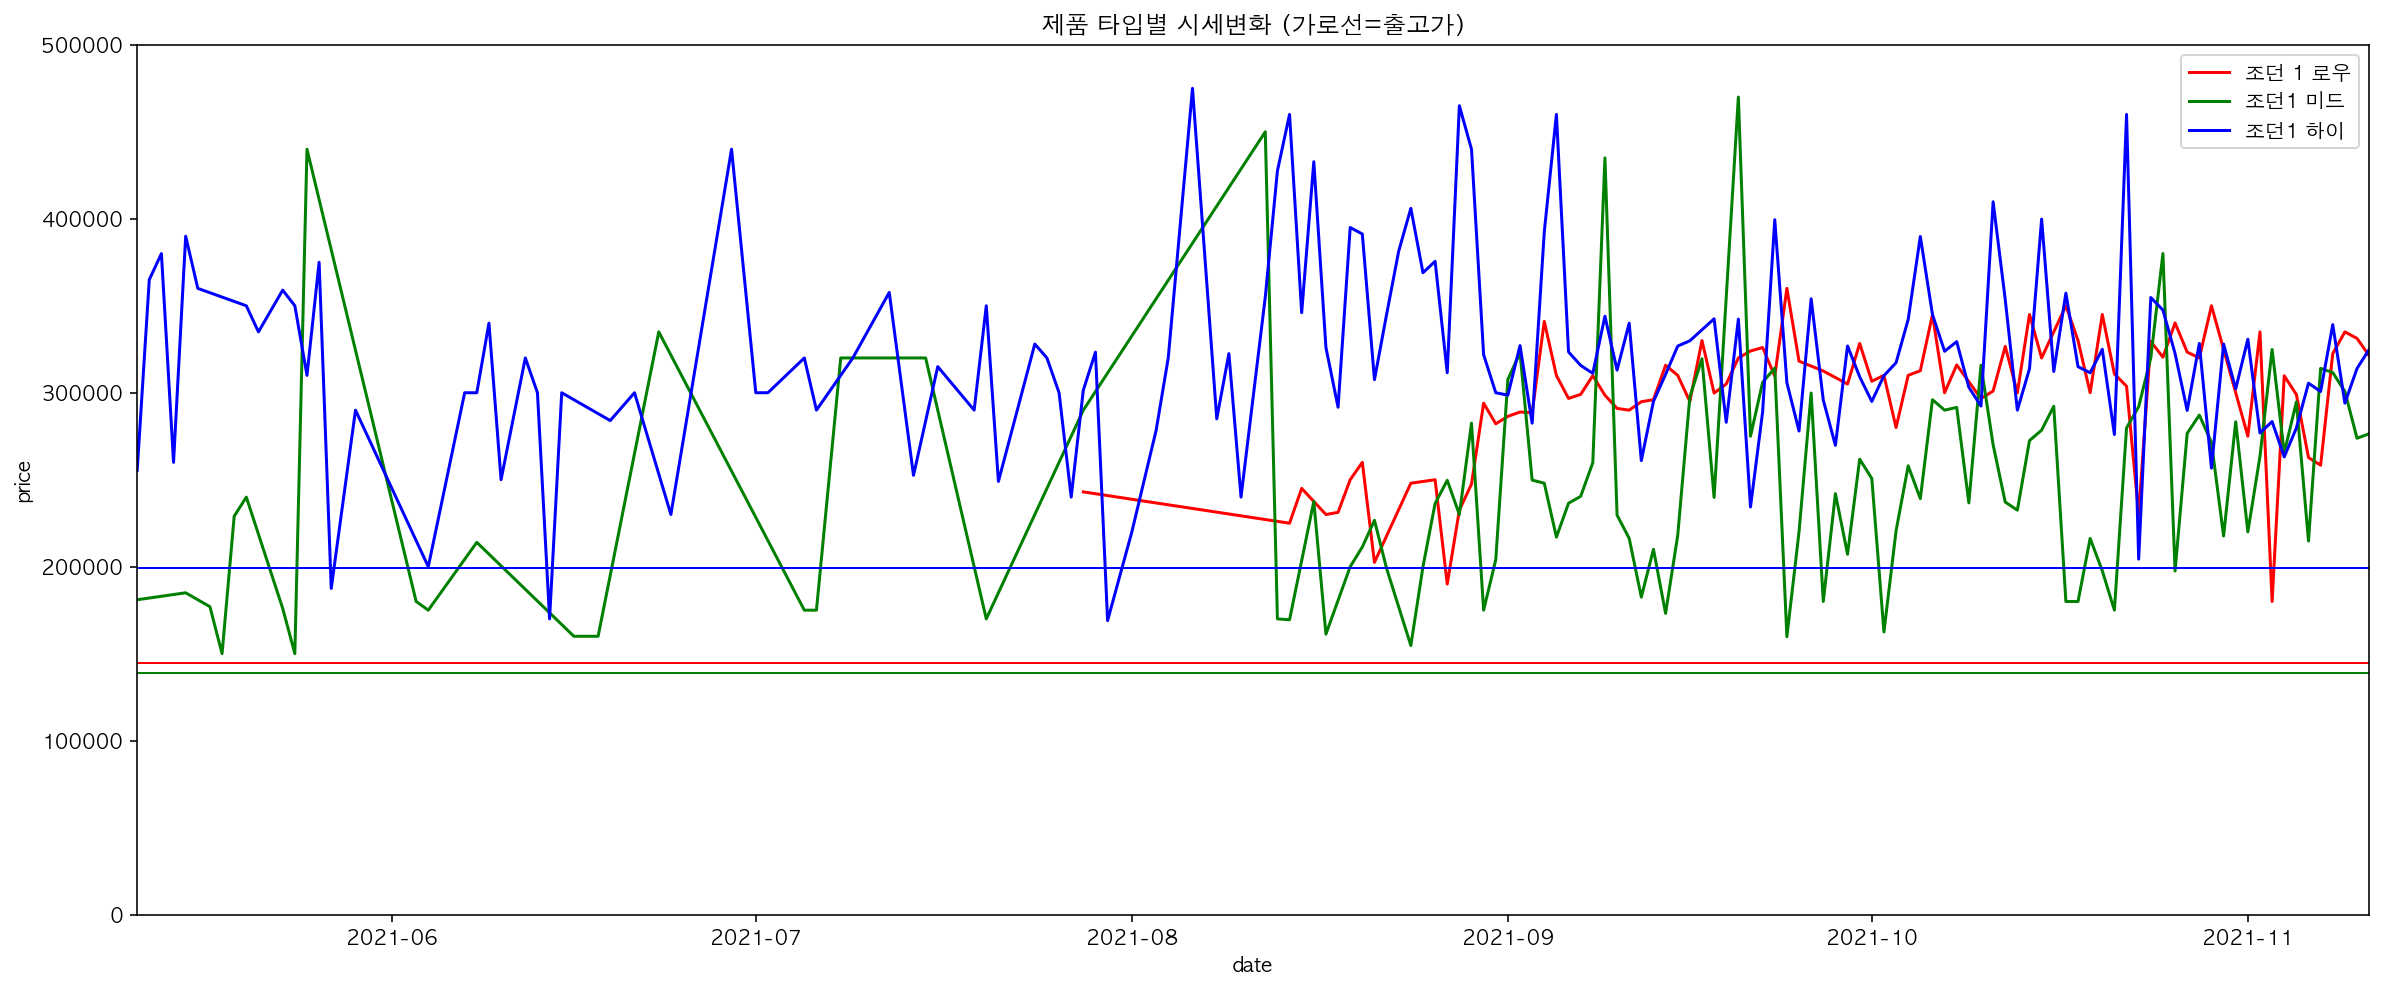

In [305]:
plt.figure(figsize=(20,8))
for col, cr in zip(column_list, color_list):
    sns.lineplot(data=pivot_df['mean'], x=pivot_df['mean'].index, y=pivot_df['mean'][col], label=col, color=cr)
    plt.axhline(y=df[df['product_type']==col]['release_price'].mean(), color=cr , linewidth=1)
plt.title('제품 타입별 시세변화 (가로선=출고가)')
plt.xlabel('date')
plt.ylabel('price')
plt.ylim([0,500000])
plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

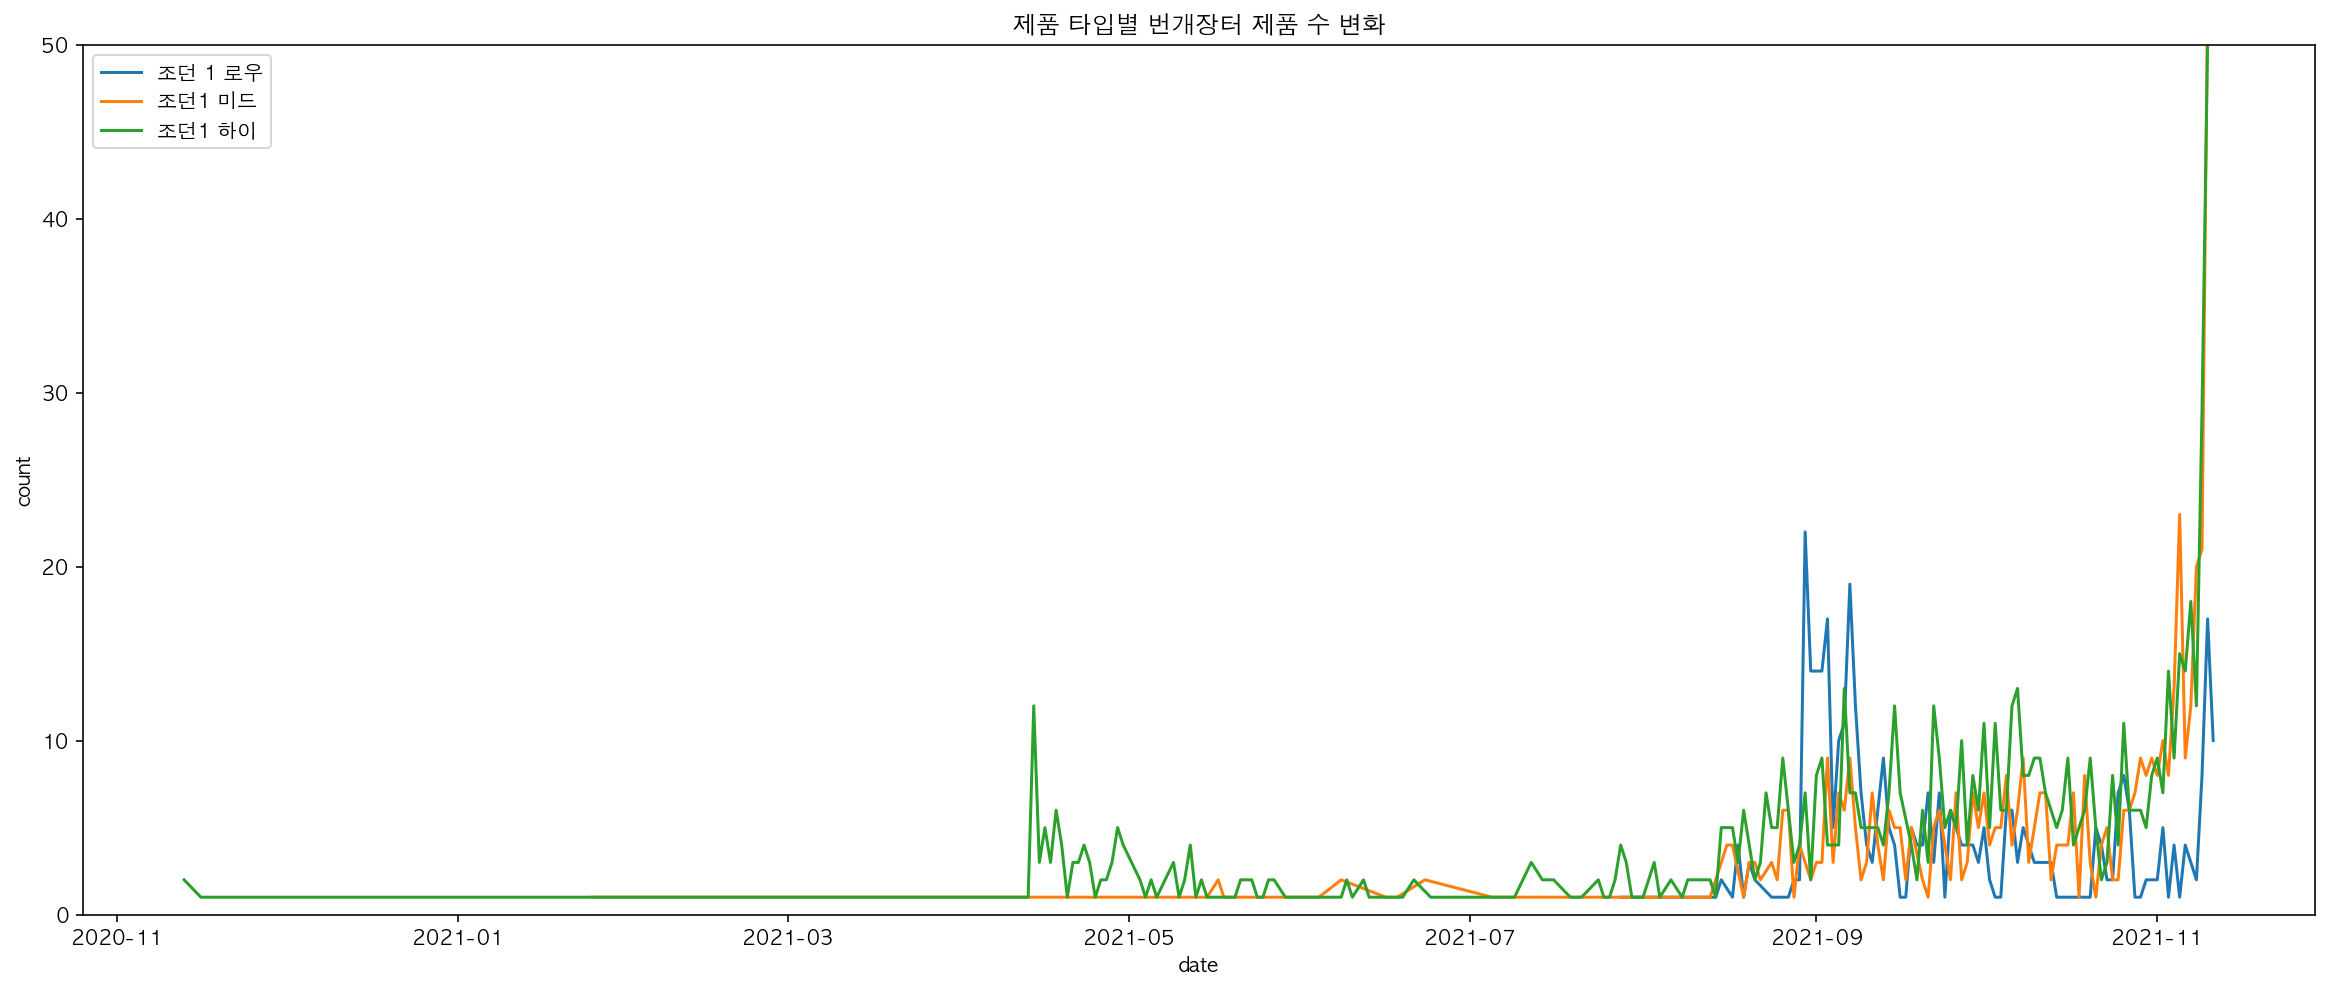

In [308]:
plt.figure(figsize=(20,8))
for col in column_list:
    sns.lineplot(data=pivot_df['count'], x=pivot_df['count'].index, y=pivot_df['count'][col], label=col)
plt.title('제품 타입별 번개장터 제품 수 변화')
plt.xlabel('date')
plt.ylabel('count')
plt.ylim([0,50])
# plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

## 5.4 시각화3 - 지도 위에 그려보기

### 5.4.1 환경 설정

In [1]:
import folium

# 코로플레스를 위한 시/군/구별 좌표 json파일 가져오기
import json

geo_path = './data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

ModuleNotFoundError: No module named 'folium'

In [356]:
data_count = pd.pivot_table(data, index='location2', values='pid', aggfunc='count')

In [357]:
data_count

pid
location2     
NUL        771
가평군          2
강남구        128
강동구         95
강릉시         11
...        ...
홍성군          4
화성시         78
화순군          3
화천군          1
횡성군          1

[164 rows x 1 columns]

In [358]:
data_count = data_count.drop('NUL')

### 5.4.2 코로플레스 지도

In [359]:
# 코로플레스 지도 그리기
m = folium.Map(location=[36, 128], zoom_start=7, tiles='OpenStreetMap')  #tiles = 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain'

m.choropleth(
    geo_data = geo_str,
    data = data_count['pid'],
    columns = ['location2','pid'],
               fill_color = 'PuRd', # 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'
               key_on = 'feature.properties.name',
               legend_name='Number of bunkae_transaction')

m.save('bunkae_location.html')
m

In [361]:
# 어디에서 많이 팔았나
data_count.sort_values(by='pid', ascending=False).head(10)

pid
location2     
서구         197
남구         178
수원시        171
부천시        159
송파구        157
북구         147
성남시        142
중구         139
고양시        137
강남구        128

## 5.5 네이버 트렌드 검색량 추이
- 브랜드별로 제품의 검색량 추이가 어땠는지 살펴본다.
- 출처 : 
- 기준 : 

In [369]:
shop = pd.read_csv('./data/NAVER_shop.csv')
trend = pd.read_csv('./data/NAVER_trend.csv')

In [370]:
trend.head(1)

날짜  조던1 하이 다크모카  조던1 하이 스모크그레이  조던1 하이 하이퍼로얄  조던1 미드 그레이포크  \
0  2020-11-01            0              7             0             0   

   조던1 미드 스모크그레이  조던1 미드 울프그레이  조던1 미드 짐레드  조던1 로우 스타피쉬  조던1 로우 울프그레이  \
0              3             0           0            0             0   

   조던1 로우 트레비스 스캇  나이키 덩크하이 네이비  나이키 덩크하이 범고래  나이키 덩크하이 오렌지  나이키 덩크 로우 골든로드   \
0               0             0             0             0                0   

   나이키 덩크 로우 라이트본  나이키 덩크 로우 바시티그린  나이키 덩크 로우 범고래  나이키 덩크 로우 유니버시티블루  \
0               0                0              0                  0   

   나이키 덩크로우 코스트  뉴발란스 992 그레이  뉴발란스 992 네이비  뉴발란스 992 블랙그레이  뉴발란스 992 화이트실버  \
0             0             7             5               0               1   

   뉴발란스 993 그레이  뉴발란스 993 네이비  뉴발란스 993 블랙  
0            32             7           15

In [371]:
trend['날짜'] = pd.to_datetime(trend['날짜'])

In [372]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   날짜                 378 non-null    datetime64[ns]
 1   조던1 하이 다크모카        378 non-null    float64       
 2   조던1 하이 스모크그레이      378 non-null    float64       
 3   조던1 하이 하이퍼로얄       378 non-null    float64       
 4   조던1 미드 그레이포크       378 non-null    int64         
 5   조던1 미드 스모크그레이      378 non-null    float64       
 6   조던1 미드 울프그레이       378 non-null    float64       
 7   조던1 미드 짐레드         378 non-null    float64       
 8   조던1 로우 스타피쉬        378 non-null    float64       
 9   조던1 로우 울프그레이       378 non-null    float64       
 10  조던1 로우 트레비스 스캇     378 non-null    float64       
 11  나이키 덩크하이 네이비       378 non-null    float64       
 12  나이키 덩크하이 범고래       378 non-null    float64       
 13  나이키 덩크하이 오렌지       378 non-null    float64       
 14  나이키 덩크 로우 

In [373]:
trend.columns[1:]

Index(['조던1 하이 다크모카', '조던1 하이 스모크그레이', '조던1 하이 하이퍼로얄', '조던1 미드 그레이포크',
       '조던1 미드 스모크그레이', '조던1 미드 울프그레이', '조던1 미드 짐레드', '조던1 로우 스타피쉬',
       '조던1 로우 울프그레이', '조던1 로우 트레비스 스캇', '나이키 덩크하이 네이비', '나이키 덩크하이 범고래',
       '나이키 덩크하이 오렌지', '나이키 덩크 로우 골든로드 ', '나이키 덩크 로우 라이트본', '나이키 덩크 로우 바시티그린',
       '나이키 덩크 로우 범고래', '나이키 덩크 로우 유니버시티블루', '나이키 덩크로우 코스트', '뉴발란스 992 그레이',
       '뉴발란스 992 네이비', '뉴발란스 992 블랙그레이', '뉴발란스 992 화이트실버', '뉴발란스 993 그레이',
       '뉴발란스 993 네이비', '뉴발란스 993 블랙'],
      dtype='object')

In [374]:
jodan1_cols = trend.columns[trend.columns.str.contains('조던1')]
nike_cols = trend.columns[trend.columns.str.contains('나이키')]
newbal_cols = trend.columns[trend.columns.str.contains('뉴발란스')]

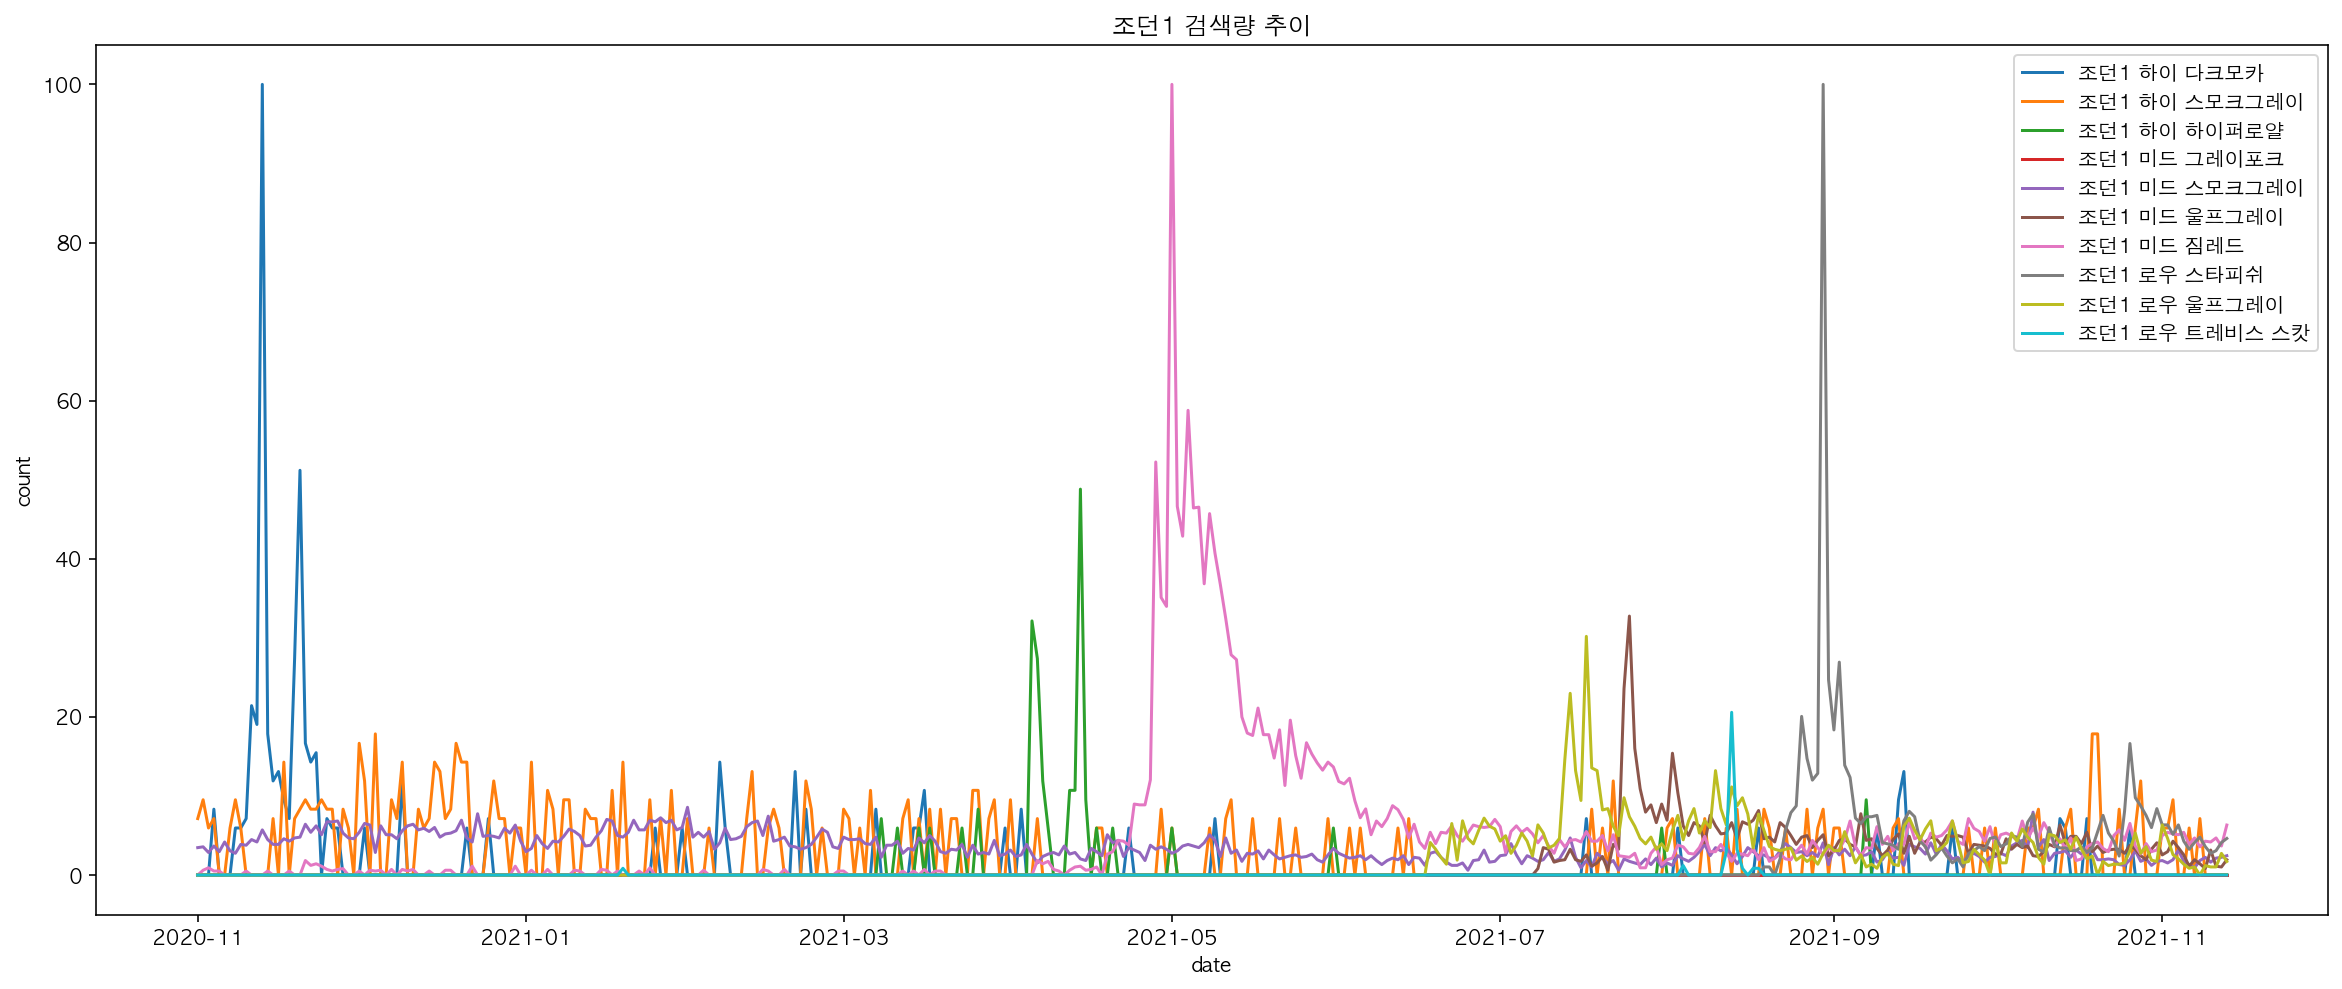

In [378]:
plt.figure(figsize=(20,8))
for col in jodan1_cols:
    sns.lineplot(data=trend, x=trend['날짜'], y=trend[col], label=col)
plt.title('조던1 검색량 추이')
plt.xlabel('date')
plt.ylabel('count')
# plt.ylim([0,50])
# plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

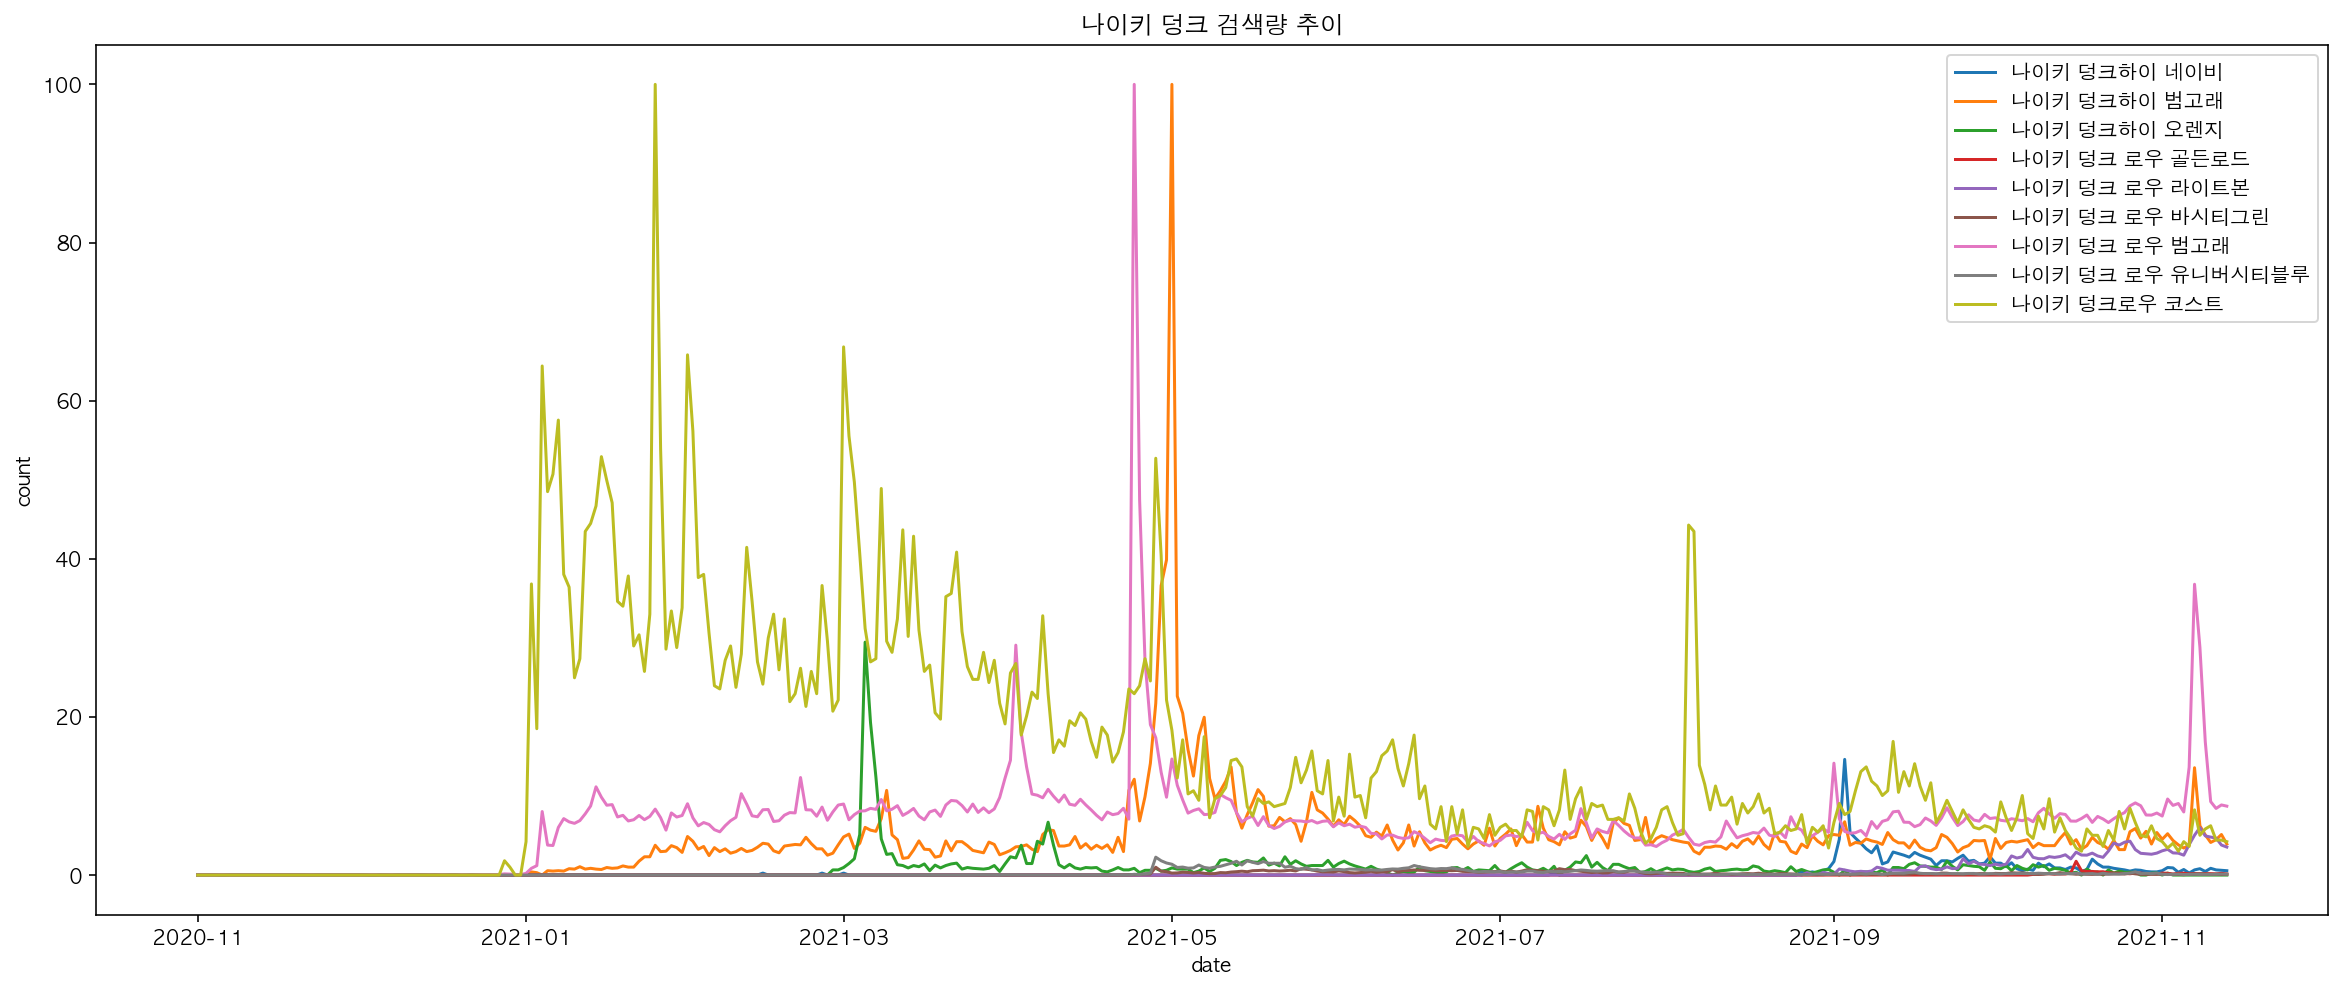

In [379]:
plt.figure(figsize=(20,8))
for col in nike_cols:
    sns.lineplot(data=trend, x=trend['날짜'], y=trend[col], label=col)
plt.title('나이키 덩크 검색량 추이')
plt.xlabel('date')
plt.ylabel('count')
# plt.ylim([0,50])
# plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

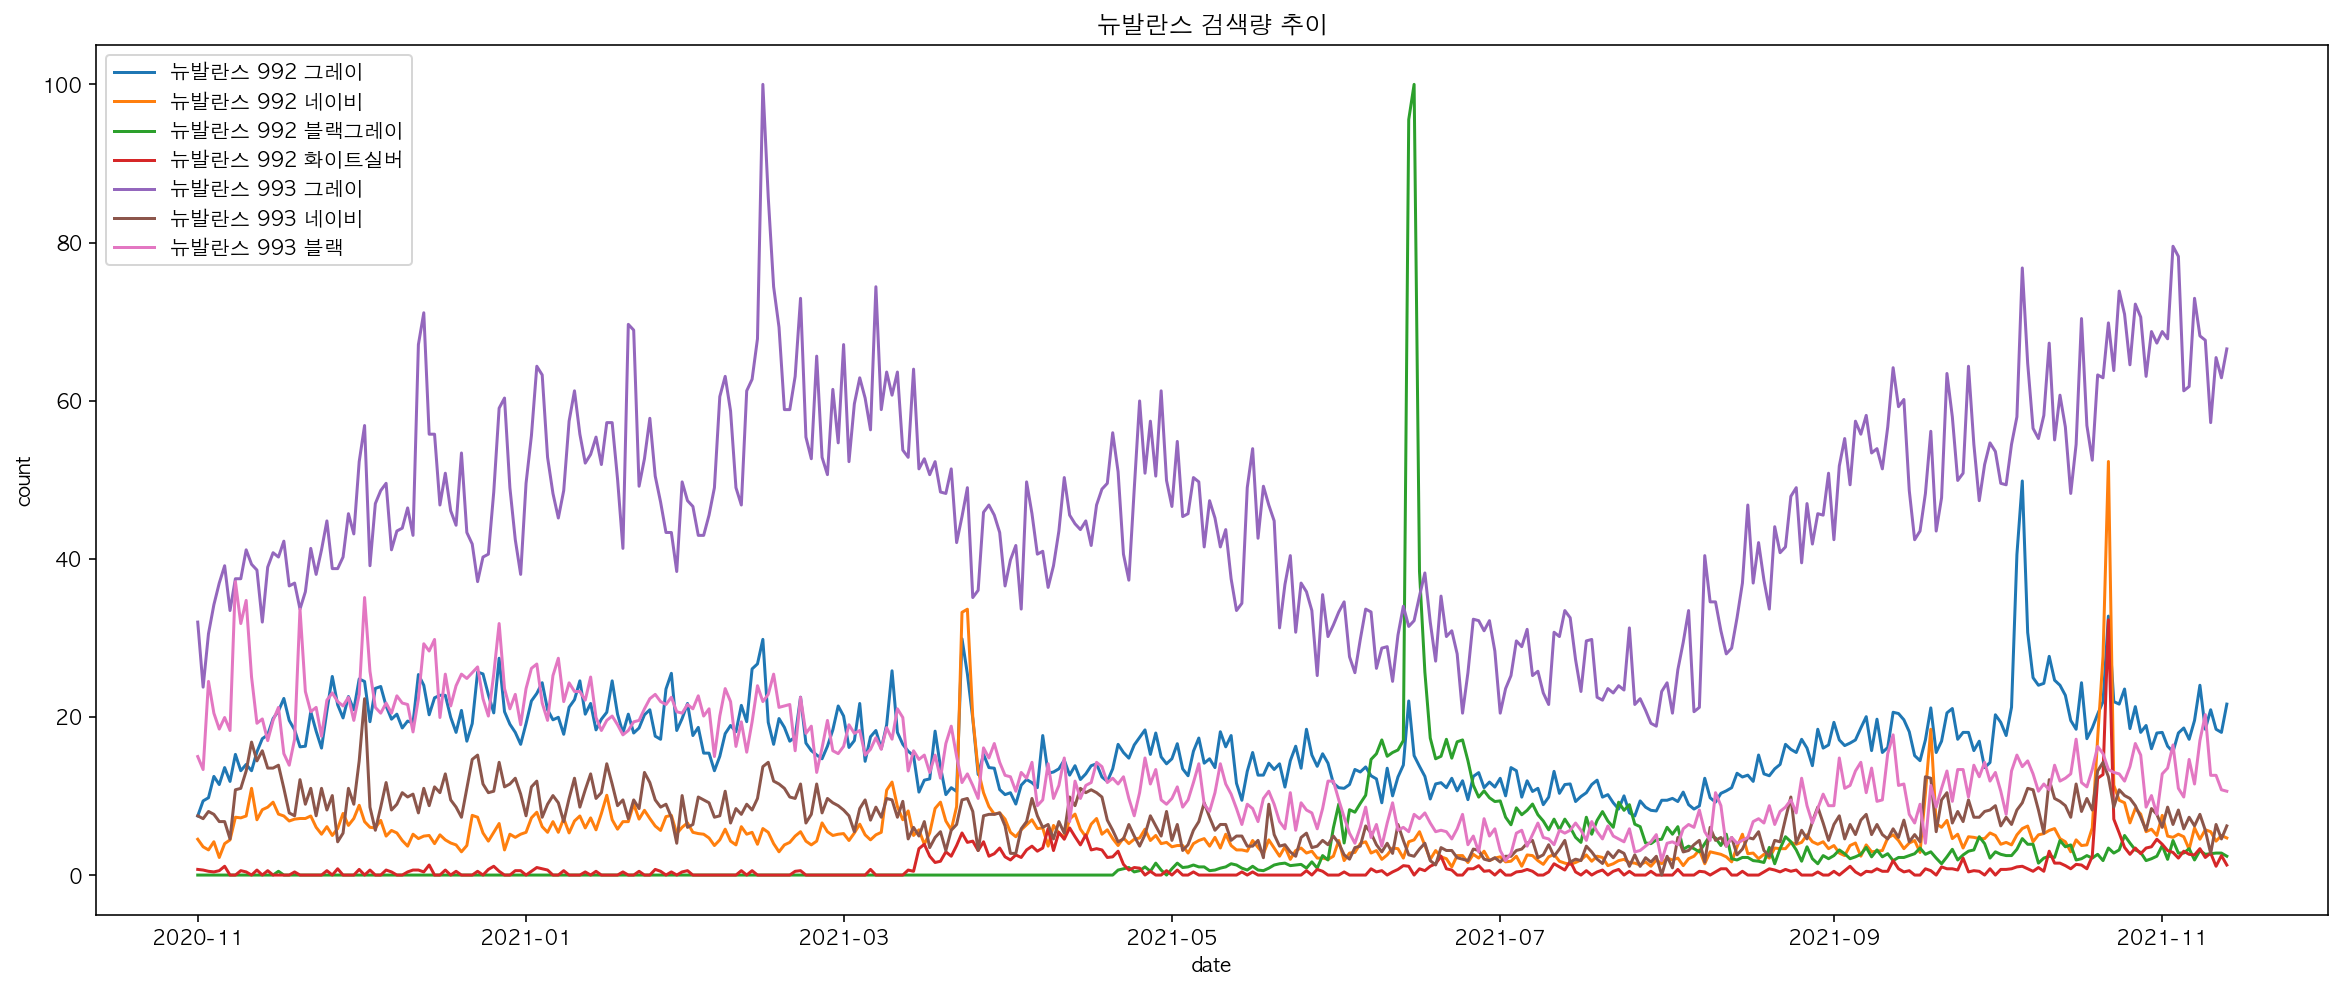

In [380]:
plt.figure(figsize=(20,8))
for col in newbal_cols:
    sns.lineplot(data=trend, x=trend['날짜'], y=trend[col], label=col)
plt.title('뉴발란스 검색량 추이')
plt.xlabel('date')
plt.ylabel('count')
# plt.ylim([0,50])
# plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

### price와 검색량 추이 함께 비교

In [398]:
newbal993gray = normal_price[normal_price['product_name'] == '뉴발란스 993 그레이'].reset_index(drop=True)
print(newbal993gray.shape)
newbal993gray.tail(1)

(217, 17)


pid      uid  product_name brand product_type color size   price  \
216  147094136  7038954  뉴발란스 993 그레이  뉴발란스     뉴발란스 993   그레이  230  260000   

     release_price             datetime       date location1 location2 status  \
216         182700  2021-03-23 17:56:51 2021-03-23     부산광역시      해운대구   판매완료   

    used               name  abnormal_price  
216  새상품  [230]뉴발란스 993 그레이           False

In [410]:
left_test = newbal993gray.groupby('date')['price'].agg(['mean', 'count']).reset_index()

In [412]:
left_test.tail(1)

date   mean  count
82 2021-11-11 234000     34

In [413]:
right_test = trend[['날짜','뉴발란스 993 그레이']]
right_test.columns = ['date', 'trend_count']

In [414]:
test = pd.merge(left_test, right_test, how='outer', on='date')
print(test.shape)
test.tail(1)

(378, 4)


date  mean  count  trend_count
377 2021-11-13   NaN    NaN           67

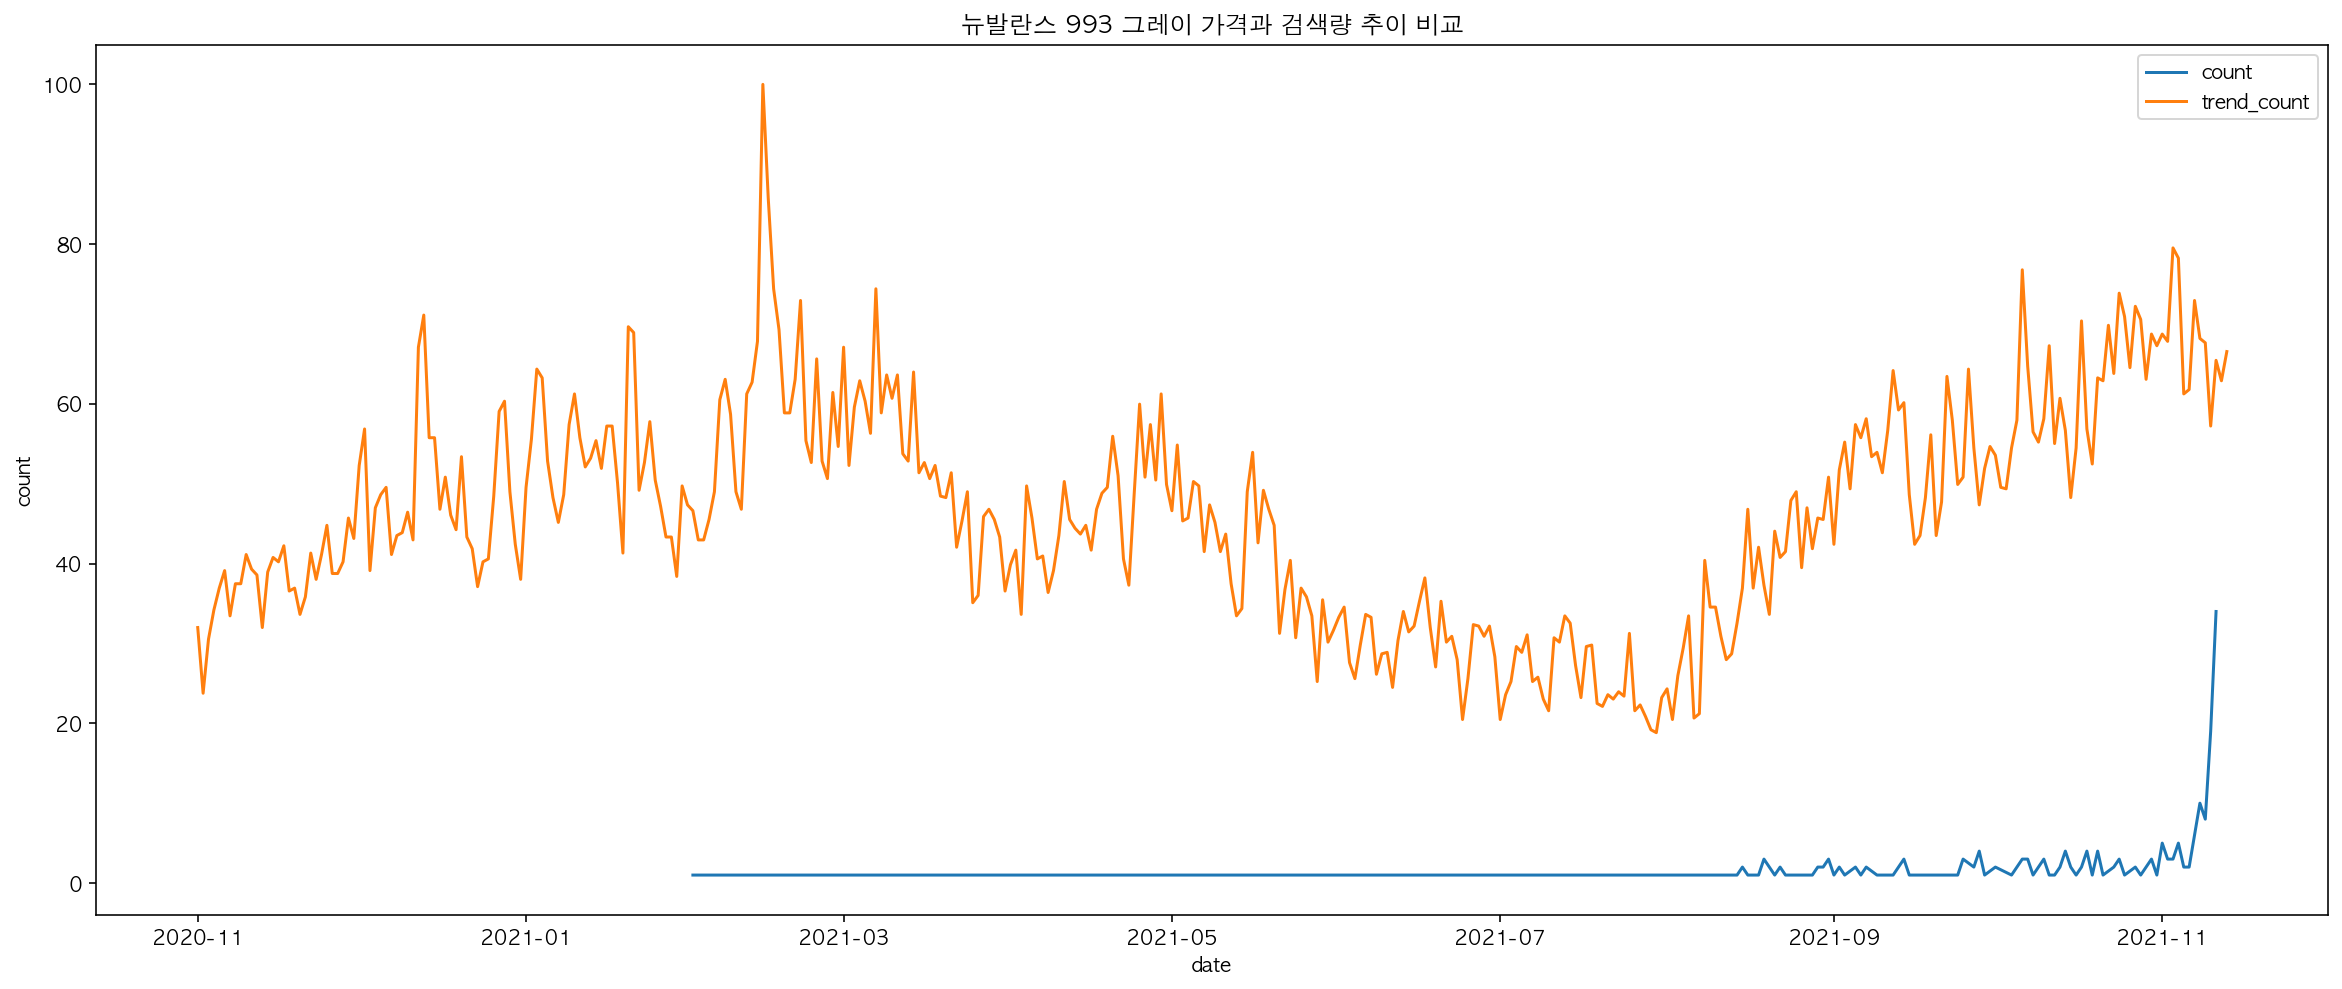

In [415]:
# 스케일이 똑같아야한다!!!!

plt.figure(figsize=(20,8))
sns.lineplot(data=test, x='date', y='count', label='count')
sns.lineplot(data=test, x='date', y='trend_count', label='trend_count')
plt.title('뉴발란스 993 그레이 가격과 검색량 추이 비교')
plt.xlabel('date')
plt.ylabel('count')
# plt.ylim([0,50])
# plt.xlim(pd.to_datetime(['2021-05-11', '2021-11-11']))
plt.legend()
plt.show()

# 6. Conclusion